# Best for balance by confidence (~983 helpful / ~641 not helpful) bases = 0.79064


SVM
combined (helpful/not_help)
features : liwc, inq, extracted aspects
k = 46

## Optimizing approaches 

1. extracted aspects scale features []
2. hyperparameters []
3. add more features (khaled's, extract again) []
4. balance data : reduced accuracy to []
4. extracted aspects stemming []


In [4]:
# read books data
hotels_data = pd.read_csv("appen_translated - hotels.csv")
hotels_conf = hotels_data[(hotels_data["confidence"] == 1.0) & (hotels_data["helpfulness"] == "helpful") | (hotels_data["helpfulness"] != "helpful")]

In [9]:
hotels_data.groupby("helpfulness").count()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,confidence,no,review,review_en
helpfulness,,,,,,,,,
helpful,2143,2143,2143,2143,2143,2143,2143,2143,2143
not_helpful,135,135,135,135,135,135,135,135,135
somewhat_helpful,475,475,475,475,475,475,475,475,475
unrelated,31,31,31,31,31,31,31,31,31


In [10]:
hotels_conf.groupby("helpfulness").count()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,confidence,no,review,review_en
helpfulness,,,,,,,,,
helpful,983,983,983,983,983,983,983,983,983
not_helpful,135,135,135,135,135,135,135,135,135
somewhat_helpful,475,475,475,475,475,475,475,475,475
unrelated,31,31,31,31,31,31,31,31,31


In [11]:
#extract features
#liwc_full = liwc_extract(hotels_data["review_en"])
#inq_full = inq_extract(hotels_data["review_en"])

#store
#liwc_full.to_csv("liwc_hotels_full.csv")
#inq_full.to_csv("inq_hotels_full.csv")

#load
liwc_full = pd.read_csv("liwc_books_full.csv").drop(columns=["Unnamed: 0"])
inq_full = pd.read_csv("inq_books_full.csv").drop(columns=["Unnamed: 0"])

In [12]:
liwc_conf = liwc_full.reindex(hotels_conf.index)
inq_conf = inq_full.reindex(hotels_conf.index)

In [124]:
# books aspects (extracted from our feature extraction code)

hotels_aspects = ['hotel', 'room', 'service', 'breakfast', 'reception', 'place', 'price', 'staff', 'clean', 'restaurant','site', 'cleanliness','time', 'apartment','nothing', 'comfortable', 'bathroom', 'Wi Fi', 'location', 'bed', 'parking','car', 'guest', 'Patient', 'need','furniture', 'close', 'one', 'campus', 'quiet', 'reception staff', 'water', 'crew', 'special', 'comfort', 'stay', 'level'] #get from wordcloud

#extract aspects features
#aspect_reviews = extract_aspects(hotels_data["review_en"],hotels_aspects)
#aspect_reviews = pd.DataFrame(aspect_reviews)
#aspect_reviews.columns = hotels_aspects

#save
#aspect_reviews.to_csv("aspects_hotels_full.csv")

#load
aspect_reviews = pd.read_csv("aspects_hotels_full.csv").drop(columns=["Unnamed: 0"])

In [125]:
# join features
aspects_conf = aspect_reviews.reindex(hotels_conf.index)

In [126]:
aspects_conf

,hotel,room,good,service,excellent,bad,breakfast,reception,place,price,...,one,campus,quiet,reception staff,water,crew,special,comfort,stay,level
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2778,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2779,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2780,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
features_conf = join_features_df([liwc_conf,inq_conf,aspects_conf])

In [19]:
features_conf

,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,site,small,special,staff,stay,thank,water,weak,well,wonderful
0,0.038760,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.178295,0.315789,0.230769,0.4,0.0,0.0,0.2,0.00,0.1875,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.162791,0.263158,0.153846,0.0,0.2,0.0,0.0,0.25,0.1875,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.046512,0.052632,0.000000,0.0,0.0,0.0,0.0,0.00,0.0625,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,0.201550,0.210526,0.153846,0.2,0.0,0.0,0.2,0.00,0.1250,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2778,0.085271,0.105263,0.076923,0.2,0.0,0.0,0.0,0.00,0.0625,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2779,0.085271,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0000,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2780,0.054264,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0000,0.125000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
#classes 
classes_conf = hotels_conf["helpfulness"].map(lambda x: "not_helpful" if x != "helpful" else "helpful")

In [22]:
classes_conf[:100]

0      helpful
1      helpful
3      helpful
5      helpful
7      helpful
        ...   
250    helpful
253    helpful
254    helpful
257    helpful
260    helpful
Name: helpfulness, Length: 100, dtype: object

In [28]:
sum(classes_conf == "not_helpful")

641

In [ ]:
ex_with_best_k(features_conf,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
Decision Tree
Confusion Matrix : 
[[131 113]
 [ 31 131]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[131 113]
 [ 31 131]]

 Prediction Accuracy :  0.645320197044335
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[139 105]
 [ 39 123]]

 Prediction Accuracy :  0.645320197044335
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 51 111]]

 Prediction Accuracy :  0.6970443349753694
Random Forest
Confusion 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[202  42]
 [ 63  99]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [159   3]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[194  50]
 [ 56 106]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matrix : 
[[201  43]
 [ 69  93]]

 Prediction Accuracy :  0.7241379310344828
Random Forest
Confusion Matrix : 
[[208  36]
 [ 69  93]]

 Prediction Accuracy :  0.7413793103448276
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[233  11]
 [159   3]]

 Prediction Accuracy :  0.5812807881773399
SVM
Confusion Matrix : 
[[173  71]
 [ 42 120]]

 Prediction Accuracy :  0.7216748768472906
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 56 106]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[233  11]
 [159   3]]

 Prediction Accuracy :  0.5812807881773399
SVM
Confusion Matrix : 
[[200  44]
 [ 57 105]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[200  44]
 [ 60 102]]

 Prediction Accuracy :  0.7438423645320197
Random Forest
Confusion Matrix : 
[[218  26]
 [ 75  87]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 59 103]]

 Prediction Accuracy :  0.7339901477832512
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[233  11]
 [159   3]]

 Prediction Accuracy :  0.5812807881773399
SVM
Confusion Matrix : 
[[199  45]
 [ 46 116]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 48 114]]

 Prediction Accuracy :  0.7142857142857143
Random Forest
Confusion Matrix : 
[[220  24]
 [ 65  97]]

 Prediction Accuracy :  0.7807881773399015


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[202  42]
 [ 58 104]]

 Prediction Accuracy :  0.7536945812807881
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [161   1]]

 Prediction Accuracy :  0.5788177339901478
SVM
Confusion Matrix : 
[[192  52]
 [ 45 117]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 52 110]]

 Prediction Accuracy :  0.7118226600985221
Random Forest
Confusion Matrix : 
[[224  20]
 [ 85  77]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 51 111]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[231  13]
 [160   2]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[193  51]
 [ 47 115]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 52 110]]

 Prediction Accuracy :  0.7093596059113301
Random Forest
Confusion Matrix : 
[[219  25]
 [ 71  91]]

 Prediction Accuracy :  0.7635467980295566
NN
Confusion Matrix : 
[[190  54]
 [ 48 114]]

 Prediction Accuracy :  0.7487684729064039
k = ----------  11


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[230  14]
 [160   2]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 52 110]]

 Prediction Accuracy :  0.7068965517241379
Random Forest
Confusion Matrix : 
[[216  28]
 [ 65  97]]

 Prediction Accuracy :  0.770935960591133


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[230  14]
 [160   2]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[162  82]
 [ 47 115]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[214  30]
 [ 74  88]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[196  48]
 [ 52 110]]

 Prediction Accuracy :  0.7536945812807881
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[230  14]
 [160   2]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[197  47]
 [ 47 115]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 46 116]]

 Prediction Accuracy :  0.7044334975369458
Random Forest
Confusion Matrix : 
[[214  30]
 [ 75  87]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 48 114]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[230  14]
 [160   2]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[199  45]
 [ 47 115]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 44 118]]

 Prediction Accuracy :  0.7093596059113301
Random Forest
Confusion Matrix : 
[[218  26]
 [ 75  87]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 53 109]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [160   2]]

 Prediction Accuracy :  0.5689655172413793
SVM
Confusion Matrix : 
[[200  44]
 [ 47 115]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 45 117]]

 Prediction Accuracy :  0.7019704433497537
Random Forest
Confusion Matrix : 
[[217  27]
 [ 74  88]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[213  31]
 [ 60 102]]

 Prediction Accuracy :  0.7758620689655172
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [158   4]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[202  42]
 [ 46 116]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 49 113]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [159   3]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[202  42]
 [ 46 116]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[164  80]
 [ 54 108]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[210  34]
 [ 61 101]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 49 113]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [159   3]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[202  42]
 [ 46 116]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 61 101]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[208  36]
 [ 58 104]]

 Prediction Accuracy :  0.7684729064039408


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 48 114]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [159   3]]

 Prediction Accuracy :  0.5689655172413793
SVM
Confusion Matrix : 
[[203  41]
 [ 45 117]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 69  93]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[207  37]
 [ 60 102]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 55 107]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [159   3]]

 Prediction Accuracy :  0.5689655172413793
SVM
Confusion Matrix : 
[[202  42]
 [ 46 116]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 62 100]]

 Prediction Accuracy :  0.6945812807881774
Random Forest
Confusion Matrix : 
[[209  35]
 [ 61 101]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 45 117]]

 Prediction Accuracy :  0.7463054187192119
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [153   9]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[203  41]
 [ 45 117]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 62 100]]

 Prediction Accuracy :  0.7068965517241379
Random Forest
Confusion Matrix : 
[[211  33]
 [ 64  98]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 53 109]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [153   9]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[203  41]
 [ 46 116]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 62 100]]

 Prediction Accuracy :  0.6995073891625616
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [153   9]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[203  41]
 [ 46 116]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 49 113]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [153   9]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[162  82]
 [ 67  95]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[208  36]
 [ 62 100]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 52 110]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [153   9]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[202  42]
 [ 47 115]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[159  85]
 [ 64  98]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[209  35]
 [ 62 100]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 50 112]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [153   9]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[202  42]
 [ 46 116]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 72  90]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[208  36]
 [ 59 103]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 48 114]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [153   9]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[202  42]
 [ 50 112]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 70  92]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [153   9]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[204  40]
 [ 50 112]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 44 118]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [153   9]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[203  41]
 [ 49 113]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 72  90]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 55 107]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [153   9]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[203  41]
 [ 49 113]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 69  93]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[207  37]
 [ 61 101]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [153   9]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[203  41]
 [ 49 113]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 48 114]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [153   9]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[203  41]
 [ 50 112]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 66  96]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[212  32]
 [ 63  99]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 61 101]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [154   8]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[204  40]
 [ 50 112]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 62 100]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[209  35]
 [ 64  98]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  80]
 [ 50 112]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [154   8]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[204  40]
 [ 50 112]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 69  93]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  78]
 [ 60 102]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [154   8]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[203  41]
 [ 50 112]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 68  94]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[209  35]
 [ 61 101]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 64  98]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [154   8]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[203  41]
 [ 50 112]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 67  95]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 53 109]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [154   8]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[204  40]
 [ 50 112]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 66  96]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 47 115]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [154   8]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[204  40]
 [ 49 113]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 64  98]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[211  33]
 [ 62 100]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 52 110]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [154   8]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[204  40]
 [ 49 113]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[191  53]
 [ 69  93]]

 Prediction Accuracy :  0.6995073891625616
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 49 113]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [154   8]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[206  38]
 [ 49 113]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[190  54]
 [ 64  98]]

 Prediction Accuracy :  0.7093596059113301
Random Forest
Confusion Matrix : 
[[209  35]
 [ 66  96]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[208  36]
 [ 51 111]]

 Prediction Accuracy :  0.7857142857142857
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [153   9]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[206  38]
 [ 49 113]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 60 102]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [154   8]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[205  39]
 [ 49 113]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 72  90]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 53 109]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [153   9]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[205  39]
 [ 49 113]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 71  91]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 45 117]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [154   8]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[206  38]
 [ 49 113]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 70  92]]

 Prediction Accuracy :  0.6847290640394089
Random Forest
Confusion Matrix : 
[[211  33]
 [ 64  98]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 53 109]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[212  32]
 [151  11]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[207  37]
 [ 48 114]]

 Prediction Accuracy :  0.7906403940886699
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 76  86]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 55 107]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [151  11]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[205  39]
 [ 48 114]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 77  85]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 48 114]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [151  11]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[206  38]
 [ 48 114]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 72  90]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [151  11]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[206  38]
 [ 49 113]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  78]
 [ 56 106]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [141  21]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[204  40]
 [ 49 113]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 72  90]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[211  33]
 [ 63  99]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 61 101]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 48 114]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 72  90]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 53 109]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 48 114]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[191  53]
 [ 72  90]]

 Prediction Accuracy :  0.6921182266009852
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  79]
 [ 56 106]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 72  90]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  75]
 [ 51 111]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 46 116]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 71  91]]

 Prediction Accuracy :  0.6847290640394089
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 59 103]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 73  89]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 64  98]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 70  92]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  79]
 [ 49 113]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 68  94]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[213  31]
 [ 68  94]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 54 108]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 68  94]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[209  35]
 [ 64  98]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 57 105]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 64  98]]

 Prediction Accuracy :  0.6995073891625616
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  77]
 [ 58 104]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [138  24]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[203  41]
 [ 46 116]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 71  91]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  77]
 [ 70  92]]

 Prediction Accuracy :  0.6379310344827587
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [138  24]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[203  41]
 [ 47 115]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 69  93]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 56 106]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[203  41]
 [ 47 115]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 70  92]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[201  43]
 [ 47 115]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 66  96]]

 Prediction Accuracy :  0.6576354679802956
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [138  24]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[202  42]
 [ 47 115]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 70  92]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 62 100]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [117  45]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[202  42]
 [ 47 115]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 68  94]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 64  98]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [117  45]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[206  38]
 [ 48 114]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 67  95]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[209  35]
 [ 66  96]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 66  96]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [117  45]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[206  38]
 [ 48 114]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 70  92]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 71  91]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [118  44]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[204  40]
 [ 48 114]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 73  89]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 63  99]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [117  45]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[205  39]
 [ 48 114]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[191  53]
 [ 68  94]]

 Prediction Accuracy :  0.7019704433497537
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  78]
 [ 66  96]]

 Prediction Accuracy :  0.645320197044335
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [117  45]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[205  39]
 [ 48 114]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 70  92]]

 Prediction Accuracy :  0.6822660098522167


# Start optimization

## Scale aspects


In [29]:
features_conf_s = preprocessing.MinMaxScaler().fit_transform(features_conf)

In [31]:
liwc_conf_s = preprocessing.MinMaxScaler().fit_transform(liwc_conf)
inq_conf_s = preprocessing.MinMaxScaler().fit_transform(inq_conf)
aspects_conf_s = preprocessing.MinMaxScaler().fit_transform(aspects_conf)

In [32]:
features_conf_s = join_features([liwc_conf_s,inq_conf_s,aspects_conf_s])

In [33]:
ex_with_best_k(features_conf_s,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[159  85]
 [ 38 124]]

 Prediction Accuracy :  0.6970443349753694
Decision Tree
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355
Random Forest
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[163  81]
 [ 38 124]]

 Prediction Accuracy :  0.7068965517241379
Decision Tree
Confusion Matrix : 
[[203  41]
 [ 73  89]]

 Prediction Accuracy :  0.7192118226600985
Random Forest
Confusi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 58 104]]

 Prediction Accuracy :  0.7684729064039408
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 43 119]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 71  91]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[206  38]
 [ 61 101]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 41 121]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 65  97]]

 Prediction Accuracy :  0.7512315270935961
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 41 121]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 65  97]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[210  34]
 [ 61 101]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[207  37]
 [ 64  98]]

 Prediction Accuracy :  0.7512315270935961
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[187  57]
 [ 44 118]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 63  99]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[209  35]
 [ 59 103]]

 Prediction Accuracy :  0.7684729064039408


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[203  41]
 [ 61 101]]

 Prediction Accuracy :  0.7487684729064039
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[186  58]
 [ 44 118]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 68  94]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[209  35]
 [ 64  98]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[207  37]
 [ 61 101]]

 Prediction Accuracy :  0.7586206896551724
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[187  57]
 [ 43 119]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 64  98]]

 Prediction Accuracy :  0.7536945812807881
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[188  56]
 [ 43 119]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 68  94]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[209  35]
 [ 58 104]]

 Prediction Accuracy :  0.770935960591133
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[188  56]
 [ 43 119]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[203  41]
 [ 61 101]]

 Prediction Accuracy :  0.7487684729064039
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 44 118]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 80  82]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[208  36]
 [ 61 101]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 58 104]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 46 116]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 70  92]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[208  36]
 [ 64  98]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 46 116]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 64  98]]

 Prediction Accuracy :  0.7536945812807881
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 49 113]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 69  93]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[209  35]
 [ 62 100]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 49 113]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 61 101]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 65  97]]

 Prediction Accuracy :  0.687192118226601
Random Forest
Confusion Matrix : 
[[207  37]
 [ 63  99]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 63  99]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[188  56]
 [ 73  89]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[207  37]
 [ 63  99]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 46 116]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 58 104]]

 Prediction Accuracy :  0.729064039408867
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[188  56]
 [ 47 115]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 76  86]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 53 109]]

 Prediction Accuracy :  0.7438423645320197
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 48 114]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 77  85]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 52 110]]

 Prediction Accuracy :  0.7438423645320197
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 78  84]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[209  35]
 [ 66  96]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 58 104]]

 Prediction Accuracy :  0.687192118226601
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 46 116]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 76  86]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[209  35]
 [ 68  94]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[222  22]
 [116  46]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 59 103]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 72  90]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[209  35]
 [ 70  92]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 61 101]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 48 114]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 70  92]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[209  35]
 [ 70  92]]

 Prediction Accuracy :  0.7413793103448276
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 54 108]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 76  86]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 60 102]]

 Prediction Accuracy :  0.687192118226601
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[163  81]
 [ 71  91]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 63  99]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 50 112]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 78  84]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[209  35]
 [ 66  96]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[194  50]
 [ 67  95]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 79  83]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[197  47]
 [ 60 102]]

 Prediction Accuracy :  0.7364532019704434
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 83  79]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 63  99]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 50 112]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 79  83]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[209  35]
 [ 66  96]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 63  99]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 72  90]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 57 105]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 50 112]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 76  86]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 63  99]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 50 112]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 73  89]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 50 112]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 59 103]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 50 112]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 75  87]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 63  99]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 77  85]]

 Prediction Accuracy :  0.6157635467980296
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 65  97]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 78  84]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 62 100]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 50 112]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 83  79]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 68  94]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 48 114]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 78  84]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 63  99]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 48 114]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 77  85]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 64  98]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 49 113]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 77  85]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[209  35]
 [ 67  95]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[202  42]
 [ 66  96]]

 Prediction Accuracy :  0.7339901477832512
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 76  86]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 48 114]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[202  42]
 [ 75  87]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  50
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 49 113]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 77  85]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 66  96]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 50 112]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 78  84]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 65  97]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[193  51]
 [ 51 111]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 82  80]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[207  37]
 [ 64  98]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 70  92]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[193  51]
 [ 51 111]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 80  82]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[209  35]
 [ 69  93]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 72  90]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[189  55]
 [ 51 111]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 82  80]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[190  54]
 [ 51 111]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 67  95]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[192  52]
 [ 51 111]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 83  79]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[192  52]
 [ 51 111]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 67  95]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[192  52]
 [ 51 111]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 76  86]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [161   1]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 68  94]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [154   8]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[190  54]
 [ 49 113]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 77  85]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 67  95]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [154   8]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[189  55]
 [ 50 112]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 79  83]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 71  91]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [154   8]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[189  55]
 [ 50 112]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 79  83]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 69  93]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [154   8]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[189  55]
 [ 50 112]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 77  85]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 73  89]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [154   8]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[190  54]
 [ 50 112]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 84  78]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 70  92]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [154   8]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 78  84]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[210  34]
 [ 69  93]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [145  17]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 67  95]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [143  19]]

 Prediction Accuracy :  0.6305418719211823
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 78  84]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 68  94]]

 Prediction Accuracy :  0.6576354679802956
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [143  19]]

 Prediction Accuracy :  0.6305418719211823
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 82  80]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 64  98]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [143  19]]

 Prediction Accuracy :  0.6305418719211823
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 82  80]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 72  90]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 74  88]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [143  19]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[193  51]
 [ 53 109]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 75  87]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 80  82]]

 Prediction Accuracy :  0.6305418719211823
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [143  19]]

 Prediction Accuracy :  0.6305418719211823
SVM
Confusion Matrix : 
[[196  48]
 [ 53 109]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 83  79]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 66  96]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [143  19]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[196  48]
 [ 53 109]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 79  83]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[210  34]
 [ 71  91]]

 Prediction Accuracy :  0.7413793103448276
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [143  19]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[196  48]
 [ 53 109]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 72  90]]

 Prediction Accuracy :  0.6428571428571429
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [143  19]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[195  49]
 [ 53 109]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 76  86]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 71  91]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [143  19]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[198  46]
 [ 53 109]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 72  90]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [143  19]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 72  90]]

 Prediction Accuracy :  0.6403940886699507
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[232  12]
 [141  21]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[194  50]
 [ 56 106]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 71  91]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[231  13]
 [141  21]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[194  50]
 [ 69  93]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[230  14]
 [139  23]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[196  48]
 [ 56 106]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 79  83]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[209  35]
 [ 69  93]]

 Prediction Accuracy :  0.7438423645320197
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [140  22]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[196  48]
 [ 54 108]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 76  86]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 63  99]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [138  24]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[195  49]
 [ 54 108]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 75  87]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 66  96]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [136  26]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 74  88]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[209  35]
 [ 70  92]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 67  95]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [136  26]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 75  87]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 84  78]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [137  25]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 73  89]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 81  81]]

 Prediction Accuracy :  0.6330049261083743
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [137  25]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 78  84]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  80]
 [ 66  96]]

 Prediction Accuracy :  0.6403940886699507
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [137  25]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 76  86]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[212  32]
 [ 73  89]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 66  96]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [137  25]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[189  55]
 [ 76  86]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[210  34]
 [ 70  92]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 65  97]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [137  25]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 74  88]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 67  95]]

 Prediction Accuracy :  0.687192118226601
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [135  27]]

 Prediction Accuracy :  0.6059113300492611
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 75  87]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 66  96]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [136  26]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 75  87]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 66  96]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [136  26]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 73  89]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 71  91]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [137  25]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 71  91]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 61 101]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [132  30]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[196  48]
 [ 52 110]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 73  89]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 78  84]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [131  31]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[198  46]
 [ 52 110]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 75  87]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[214  30]
 [ 72  90]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 59 103]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [132  30]]

 Prediction Accuracy :  0.6059113300492611
SVM
Confusion Matrix : 
[[195  49]
 [ 51 111]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 80  82]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[214  30]
 [ 73  89]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 70  92]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  98
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [131  31]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[195  49]
 [ 51 111]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 75  87]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[214  30]
 [ 73  89]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  99
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [131  31]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[195  49]
 [ 51 111]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix

In [27]:
#extract_classify_test(features_conf_s,classes_conf,86)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[172  46]
 [101  51]]

 Prediction Accuracy :  0.6027027027027027
------------------------
SVM
Confusion Matrix : 
[[142  76]
 [ 17 135]]

 Prediction Accuracy :  0.7486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[146  72]
 [ 50 102]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Random Forest
Confusion Matrix : 
[[192  26]
 [ 43 109]]

 Prediction Accuracy :  0.8135135135135135
------------------------
NN
Confusion Matrix : 
[[155  63]
 [ 45 107]]

 Prediction Accuracy :  0.7081081081081081
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'NB': (array([[172,  46],
         [101,  51]]),
  0.6027027027027027),
 'SVM': (array([[142,  76],
         [ 17, 135]]),
  0.7486486486486487),
 'DT': (array([[146,  72],
         [ 50, 102]]),
  0.6702702702702703),
 'RF': (array([[192,  26],
         [ 43, 109]]),
  0.8135135135135135),
 'NN': (array([[155,  63],
         [ 45, 107]]),
  0.7081081081081081)}

## Adding arabic features

increase to (0.8270)

In [35]:
ar_hotels_aspects = pd.read_csv("arabic_hotel_aspect_words.csv")

In [37]:
ar_hotels_aspects

,الخدمه
0,خدمه
1,الاستقبال
2,استقبال
3,موظف
4,الموظف
5,الطاقم
6,طاقم
7,موقع
8,الموقع
9,قرب


In [38]:
l = list(ar_hotels_aspects["الخدمه"])
l.append("الخدمه")
ar_hotels_aspects = l
ar_hotels_aspects

['خدمه',
 'الاستقبال',
 'استقبال',
 'موظف',
 'الموظف',
 'الطاقم',
 'طاقم',
 'موقع',
 'الموقع',
 'قرب',
 'القرب',
 'قريب',
 'السرير',
 'سرير',
 'النظافه',
 'نظافه',
 'رائحه',
 'الرائحه',
 'السعر',
 'سعر',
 'الحمام',
 'حمام',
 'المواقف',
 'مواقف',
 'الفطور',
 'فطور',
 'الانترنت',
 'انترنت',
 'الواي فاي',
 'واي فاي',
 'الخدمه']

In [41]:
ar_aspects_reviews = extract_aspects_df(hotels_data["review"],ar_hotels_aspects)

خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي


فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواق

طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف

الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظا

واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
ان

قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طا

حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
ال

الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي ف

انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور

الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام

الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقب

الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي ف

الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
ا

الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام

الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الر

خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي


استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه


قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طا

موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الا

نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السري

انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور

موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
المو

سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه

الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الو

الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبا

واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
ان

قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طا

الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
ال

موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
المو

فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواق

السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع


طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف

سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه

الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الو

النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قر

الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبا

الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الر

قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طا

رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير

الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبا

رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير

استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه


سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
الق

الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الو

الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
ال

موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
المو

فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواق

فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواق

الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
موا

المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
س

الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقب

النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قريب
السرير
سرير
النظافه
نظافه
رائحه
الرائحه
السعر
سعر
الحمام
حمام
المواقف
مواقف
الفطور
فطور
الانترنت
انترنت
الواي فاي
واي فاي
الخدمه
خدمه
الاستقبال
استقبال
موظف
الموظف
الطاقم
طاقم
موقع
الموقع
قرب
القرب
قر

In [42]:
ar_aspects_conf = ar_aspects_reviews.reindex(hotels_conf.index)

In [43]:
ar_aspects_conf.sum()

خدمه          59.0
الاستقبال    289.0
استقبال      329.0
موظف         229.0
الموظف       102.0
الطاقم        36.0
طاقم         155.0
موقع         432.0
الموقع       248.0
قرب          169.0
القرب         53.0
قريب         170.0
السرير        84.0
سرير         118.0
النظافه      102.0
نظافه        125.0
رائحه         16.0
الرائحه        1.0
السعر         99.0
سعر          171.0
الحمام       125.0
حمام         157.0
المواقف       74.0
مواقف        193.0
الفطور        60.0
فطور          72.0
الانترنت      36.0
انترنت        46.0
الواي فاي     56.0
واي فاي       73.0
الخدمه        35.0
dtype: float64

In [44]:
features_conf_ar = join_features([liwc_conf,inq_conf,aspects_conf,ar_aspects_conf])

In [45]:
features_conf_ar_s =  preprocessing.MinMaxScaler().fit_transform(features_conf_ar)

In [46]:
features_conf_ar_s.shape

(1624, 330)

In [47]:
ex_with_best_k(features_conf_ar,classes_conf,300)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
Decision Tree
Confusion Matrix : 
[[131 113]
 [ 31 131]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[131 113]
 [ 31 131]]

 Prediction Accuracy :  0.645320197044335
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[139 105]
 [ 39 123]]

 Prediction Accuracy :  0.645320197044335
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 51 111]]

 Prediction Accuracy :  0.6970443349753694
Random Forest
Confusion 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[202  42]
 [ 63  99]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [159   3]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[156  88]
 [ 36 126]]

 Prediction Accuracy :  0.6945812807881774
Decision Tree
Confusion Matrix : 
[[199  45]
 [ 61 101]]

 Prediction Accuracy :  0.7389162561576355
Random Forest
Confusion Matrix : 
[[207  37]
 [ 65  97]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[233  11]
 [161   1]]

 Prediction Accuracy :  0.5763546798029556
SVM
Confusion Matrix : 
[[170  74]
 [ 45 117]]

 Prediction Accuracy :  0.7068965517241379
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[196  48]
 [ 58 104]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [159   3]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[198  46]
 [ 59 103]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[196  48]
 [ 61 101]]

 Prediction Accuracy :  0.7315270935960592
Random Forest
Confusion Matrix : 
[[215  29]
 [ 76  86]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[201  43]
 [ 60 102]]

 Prediction Accuracy :  0.7463054187192119
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[221  23]
 [157   5]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[197  47]
 [ 58 104]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[190  54]
 [ 61 101]]

 Prediction Accuracy :  0.7167487684729064
Random Forest
Confusion Matrix : 
[[217  27]
 [ 76  86]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 61 101]]

 Prediction Accuracy :  0.729064039408867
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [153   9]]

 Prediction Accuracy :  0.5394088669950738
SVM
Confusion Matrix : 
[[194  50]
 [ 54 108]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[191  53]
 [ 60 102]]

 Prediction Accuracy :  0.7216748768472906
Random Forest
Confusion Matrix : 
[[216  28]
 [ 75  87]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[192  52]
 [ 61 101]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  10


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [153   9]]

 Prediction Accuracy :  0.541871921182266
SVM
Confusion Matrix : 
[[169  75]
 [ 44 118]]

 Prediction Accuracy :  0.7068965517241379
Decision Tree
Confusion Matrix : 
[[191  53]
 [ 59 103]]

 Prediction Accuracy :  0.7241379310344828
Random Forest
Confusion Matrix : 
[[219  25]
 [ 78  84]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 59 103]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [153   9]]

 Prediction Accuracy :  0.541871921182266
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 50 112]]

 Prediction Accuracy :  0.6945812807881774
Random Forest
Confusion Matrix : 
[[218  26]
 [ 66  96]]

 Prediction Accuracy :  0.7733990147783252


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 48 114]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [155   7]]

 Prediction Accuracy :  0.5369458128078818
SVM
Confusion Matrix : 
[[188  56]
 [ 48 114]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 55 107]]

 Prediction Accuracy :  0.687192118226601
Random Forest
Confusion Matrix : 
[[220  24]
 [ 72  90]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 55 107]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [153   9]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[192  52]
 [ 51 111]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 55 107]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[220  24]
 [ 74  88]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 55 107]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [153   9]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[198  46]
 [ 51 111]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 60 102]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[231  13]
 [ 98  64]]

 Prediction Accuracy :  0.7266009852216748


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 56 106]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [153   9]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[200  44]
 [ 50 112]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 58 104]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[222  22]
 [ 78  84]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [153   9]]

 Prediction Accuracy :  0.5320197044334976
SVM
Confusion Matrix : 
[[199  45]
 [ 53 109]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [149  13]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[199  45]
 [ 53 109]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[166  78]
 [ 53 109]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[216  28]
 [ 75  87]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 51 111]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [149  13]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[202  42]
 [ 49 113]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[166  78]
 [ 52 110]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[214  30]
 [ 70  92]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  80]
 [ 55 107]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [148  14]]

 Prediction Accuracy :  0.541871921182266
SVM
Confusion Matrix : 
[[202  42]
 [ 46 116]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 52 110]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[215  29]
 [ 75  87]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [146  16]]

 Prediction Accuracy :  0.5369458128078818
SVM
Confusion Matrix : 
[[203  41]
 [ 51 111]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 52 110]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [146  16]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[206  38]
 [ 48 114]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix : 
[[166  78]
 [ 55 107]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[216  28]
 [ 76  86]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 55 107]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [146  16]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[206  38]
 [ 47 115]]

 Prediction Accuracy :  0.7906403940886699
Decision Tree
Confusion Matrix : 
[[163  81]
 [ 53 109]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[214  30]
 [ 74  88]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 60 102]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [146  16]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[206  38]
 [ 48 114]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 60 102]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[210  34]
 [ 61 101]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 52 110]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [146  16]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[206  38]
 [ 49 113]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 65  97]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 61 101]]

 Prediction Accuracy :  0.687192118226601
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [148  14]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[207  37]
 [ 48 114]]

 Prediction Accuracy :  0.7906403940886699
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 63  99]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[210  34]
 [ 59 103]]

 Prediction Accuracy :  0.770935960591133
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [148  14]]

 Prediction Accuracy :  0.5320197044334976
SVM
Confusion Matrix : 
[[207  37]
 [ 47 115]]

 Prediction Accuracy :  0.7931034482758621
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 53 109]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[209  35]
 [146  16]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[207  37]
 [ 47 115]]

 Prediction Accuracy :  0.7931034482758621
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 62 100]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[209  35]
 [ 60 102]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 44 118]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [146  16]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[206  38]
 [ 47 115]]

 Prediction Accuracy :  0.7906403940886699
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 67  95]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[211  33]
 [ 57 105]]

 Prediction Accuracy :  0.7783251231527094
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [146  16]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[206  38]
 [ 47 115]]

 Prediction Accuracy :  0.7906403940886699
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 61 101]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [146  16]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[206  38]
 [ 47 115]]

 Prediction Accuracy :  0.7906403940886699
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 71  91]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[210  34]
 [ 63  99]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 54 108]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [146  16]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[204  40]
 [ 49 113]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 70  92]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[209  35]
 [ 60 102]]

 Prediction Accuracy :  0.7660098522167488
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [145  17]]

 Prediction Accuracy :  0.5443349753694581
SVM
Confusion Matrix : 
[[204  40]
 [ 48 114]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 56 106]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [144  18]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[204  40]
 [ 48 114]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 70  92]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 51 111]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [145  17]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[204  40]
 [ 50 112]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 62 100]]

 Prediction Accuracy :  0.6847290640394089
Random Forest
Confusion Matrix : 
[[207  37]
 [ 62 100]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 51 111]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [143  19]]

 Prediction Accuracy :  0.5394088669950738
SVM
Confusion Matrix : 
[[205  39]
 [ 53 109]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 69  93]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 62 100]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 60 102]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [143  19]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[203  41]
 [ 53 109]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 67  95]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[208  36]
 [ 60 102]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 55 107]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [143  19]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[202  42]
 [ 52 110]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 69  93]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 61 101]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [143  19]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[203  41]
 [ 54 108]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 67  95]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[210  34]
 [ 59 103]]

 Prediction Accuracy :  0.770935960591133


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 50 112]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [143  19]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[203  41]
 [ 55 107]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 70  92]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[209  35]
 [ 59 103]]

 Prediction Accuracy :  0.7684729064039408


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 55 107]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [143  19]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[203  41]
 [ 57 105]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 60 102]]

 Prediction Accuracy :  0.7019704433497537
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 55 107]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [143  19]]

 Prediction Accuracy :  0.5344827586206896
SVM
Confusion Matrix : 
[[203  41]
 [ 53 109]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 65  97]]

 Prediction Accuracy :  0.6896551724137931
Random Forest
Confusion Matrix : 
[[209  35]
 [ 65  97]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 48 114]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [143  19]]

 Prediction Accuracy :  0.5320197044334976
SVM
Confusion Matrix : 
[[204  40]
 [ 53 109]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 65  97]]

 Prediction Accuracy :  0.6945812807881774
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 53 109]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [143  19]]

 Prediction Accuracy :  0.5320197044334976
SVM
Confusion Matrix : 
[[204  40]
 [ 55 107]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 64  98]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[213  31]
 [ 66  96]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 53 109]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [143  19]]

 Prediction Accuracy :  0.5320197044334976
SVM
Confusion Matrix : 
[[203  41]
 [ 55 107]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 58 104]]

 Prediction Accuracy :  0.7068965517241379
Random Forest
Confusion Matrix : 
[[209  35]
 [ 61 101]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 50 112]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [143  19]]

 Prediction Accuracy :  0.5320197044334976
SVM
Confusion Matrix : 
[[202  42]
 [ 54 108]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 66  96]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 51 111]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[195  49]
 [143  19]]

 Prediction Accuracy :  0.5270935960591133
SVM
Confusion Matrix : 
[[203  41]
 [ 53 109]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 70  92]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 63  99]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [143  19]]

 Prediction Accuracy :  0.5295566502463054
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 64  98]]

 Prediction Accuracy :  0.6970443349753694
Random Forest
Confusion Matrix : 
[[209  35]
 [ 67  95]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [144  18]]

 Prediction Accuracy :  0.5270935960591133
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  79]
 [ 51 111]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[193  51]
 [144  18]]

 Prediction Accuracy :  0.5197044334975369
SVM
Confusion Matrix : 
[[205  39]
 [ 52 110]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 70  92]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[210  34]
 [ 63  99]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 51 111]]

 Prediction Accuracy :  0.687192118226601
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[194  50]
 [145  17]]

 Prediction Accuracy :  0.5197044334975369
SVM
Confusion Matrix : 
[[205  39]
 [ 53 109]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 74  88]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 59 103]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [146  16]]

 Prediction Accuracy :  0.5221674876847291
SVM
Confusion Matrix : 
[[205  39]
 [ 51 111]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[190  54]
 [ 68  94]]

 Prediction Accuracy :  0.6995073891625616
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 59 103]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [145  17]]

 Prediction Accuracy :  0.5320197044334976
SVM
Confusion Matrix : 
[[206  38]
 [ 51 111]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 76  86]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 56 106]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [146  16]]

 Prediction Accuracy :  0.5295566502463054
SVM
Confusion Matrix : 
[[206  38]
 [ 51 111]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 70  92]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 52 110]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [146  16]]

 Prediction Accuracy :  0.5295566502463054
SVM
Confusion Matrix : 
[[205  39]
 [ 49 113]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 73  89]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 64  98]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [146  16]]

 Prediction Accuracy :  0.5295566502463054
SVM
Confusion Matrix : 
[[208  36]
 [ 52 110]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 75  87]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[211  33]
 [ 63  99]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 59 103]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [145  17]]

 Prediction Accuracy :  0.5270935960591133
SVM
Confusion Matrix : 
[[208  36]
 [ 52 110]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 73  89]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 56 106]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [138  24]]

 Prediction Accuracy :  0.5665024630541872
SVM
Confusion Matrix : 
[[205  39]
 [ 52 110]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 76  86]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[211  33]
 [ 63  99]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 55 107]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[205  39]
 [137  25]]

 Prediction Accuracy :  0.5665024630541872
SVM
Confusion Matrix : 
[[205  39]
 [ 51 111]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 68  94]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 48 114]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[205  39]
 [137  25]]

 Prediction Accuracy :  0.5665024630541872
SVM
Confusion Matrix : 
[[206  38]
 [ 51 111]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 72  90]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[213  31]
 [ 71  91]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 57 105]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[205  39]
 [137  25]]

 Prediction Accuracy :  0.5665024630541872
SVM
Confusion Matrix : 
[[204  40]
 [ 50 112]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 73  89]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  75]
 [ 63  99]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [137  25]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[205  39]
 [ 50 112]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 73  89]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 57 105]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [137  25]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[207  37]
 [ 51 111]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 73  89]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[196  48]
 [ 67  95]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [137  25]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[207  37]
 [ 51 111]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 76  86]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 59 103]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [137  25]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[206  38]
 [ 50 112]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 77  85]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 54 108]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [135  27]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 74  88]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[155  89]
 [ 76  86]]

 Prediction Accuracy :  0.5935960591133005
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [135  27]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[202  42]
 [ 51 111]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 68  94]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  80]
 [ 46 116]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [135  27]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[201  43]
 [ 51 111]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 69  93]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 77  85]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [135  27]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[200  44]
 [ 52 110]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 70  92]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 54 108]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [135  27]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 77  85]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 68  94]]

 Prediction Accuracy :  0.6576354679802956
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [135  27]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[200  44]
 [ 50 112]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 77  85]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[213  31]
 [ 68  94]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 68  94]]

 Prediction Accuracy :  0.6502463054187192
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [134  28]]

 Prediction Accuracy :  0.5689655172413793
SVM
Confusion Matrix : 
[[201  43]
 [ 51 111]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 74  88]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 66  96]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [135  27]]

 Prediction Accuracy :  0.5689655172413793
SVM
Confusion Matrix : 
[[202  42]
 [ 51 111]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 76  86]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 64  98]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [135  27]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 74  88]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[175  69]
 [ 54 108]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [136  26]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[203  41]
 [ 52 110]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 59 103]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [133  29]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[200  44]
 [ 52 110]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 73  89]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[213  31]
 [ 71  91]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 71  91]]

 Prediction Accuracy :  0.645320197044335
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [133  29]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[189  55]
 [ 77  85]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 57 105]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [113  49]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[203  41]
 [ 52 110]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 73  89]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[179  65]
 [ 56 106]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [113  49]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[202  42]
 [ 52 110]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 70  92]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [113  49]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[203  41]
 [ 52 110]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 79  83]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 68  94]]

 Prediction Accuracy :  0.6551724137931034
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [111  51]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 75  87]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 61 101]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [111  51]]

 Prediction Accuracy :  0.6133004926108374
SVM
Confusion Matrix : 
[[201  43]
 [ 53 109]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 76  86]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[210  34]
 [ 69  93]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[189  55]
 [ 60 102]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [111  51]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[201  43]
 [ 53 109]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[196  48]
 [ 77  85]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [111  51]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[201  43]
 [ 53 109]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 79  83]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[177  67]
 [ 63  99]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [111  51]]

 Prediction Accuracy :  0.6133004926108374
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[209  35]
 [ 79  83]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [111  51]]

 Prediction Accuracy :  0.6133004926108374
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 74  88]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[184  60]
 [ 65  97]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [111  51]]

 Prediction Accuracy :  0.6133004926108374
SVM
Confusion Matrix : 
[[201  43]
 [ 51 111]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 65  97]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [112  50]]

 Prediction Accuracy :  0.6133004926108374
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 77  85]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 68  94]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [112  50]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[204  40]
 [ 52 110]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 79  83]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[242   2]
 [160   2]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [112  50]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[204  40]
 [ 51 111]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 69  93]]

 Prediction Accuracy :  0.6502463054187192
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [112  50]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[205  39]
 [ 51 111]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 81  81]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 68  94]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [112  50]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[205  39]
 [ 51 111]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 78  84]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[181  63]
 [ 61 101]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [112  50]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[205  39]
 [ 51 111]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 66  96]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  101
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [106  56]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[202  42]
 [ 50 112]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 78  84]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  102
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [106  56]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[199  45]
 [ 49 113]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 69  93]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  105
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [106  56]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[200  44]
 [ 48 114]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 77  85]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 68  94]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  106
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [105  57]]

 Prediction Accuracy :  0.6280788177339901
SVM
Confusion Matrix : 
[[198  46]
 [ 49 113]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 72  90]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[177  67]
 [ 65  97]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  107
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [106  56]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[198  46]
 [ 49 113]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 61 101]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  109
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [106  56]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 78  84]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 64  98]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  110
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [106  56]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[200  44]
 [ 48 114]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[190  54]
 [ 76  86]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[175  69]
 [ 66  96]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  111
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [109  53]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 61 101]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  112
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[199  45]
 [109  53]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 51 111]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 77  85]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[173  71]
 [ 53 109]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  113
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[197  47]
 [110  52]]

 Prediction Accuracy :  0.6133004926108374
SVM
Confusion Matrix : 
[[200  44]
 [ 51 111]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 61 101]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  116
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [106  56]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[200  44]
 [ 47 115]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 80  82]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  75]
 [ 65  97]]

 Prediction Accuracy :  0.6551724137931034
k = ----------  117
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [106  56]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[200  44]
 [ 46 116]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 75  87]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 70  92]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  118
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [106  56]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[199  45]
 [ 47 115]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 76  86]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[194  50]
 [ 64  98]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  119
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [106  56]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[196  48]
 [ 50 112]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 72  90]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[213  31]
 [ 68  94]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 67  95]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  120
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [106  56]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[198  46]
 [ 49 113]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 74  88]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[213  31]
 [ 66  96]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[186  58]
 [ 62 100]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  121
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [106  56]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[198  46]
 [ 50 112]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 71  91]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  127
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[195  49]
 [105  57]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[199  45]
 [ 49 113]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 74  88]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[209  35]
 [ 64  98]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 77  85]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  128
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[195  49]
 [105  57]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[198  46]
 [ 49 113]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 71  91]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  129
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [104  58]]

 Prediction Accuracy :  0.6305418719211823
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 80  82]]

 Prediction Accuracy :  0.6477832512315271
k = ----------  131
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[195  49]
 [ 98  64]]

 Prediction Accuracy :  0.6379310344827587
SVM
Confusion Matrix : 
[[197  47]
 [ 47 115]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 70  92]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[180  64]
 [ 69  93]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  132
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[195  49]
 [ 98  64]]

 Prediction Accuracy :  0.6379310344827587
SVM
Confusion Matrix : 
[[197  47]
 [ 47 115]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 65  97]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  136
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[193  51]
 [ 97  65]]

 Prediction Accuracy :  0.6354679802955665
SVM
Confusion Matrix : 
[[197  47]
 [ 48 114]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 78  84]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[211  33]
 [ 64  98]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[242   2]
 [158   4]]

 Prediction Accuracy :  0.6059113300492611
k = ----------  137
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[194  50]
 [ 93  69]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[198  46]
 [ 48 114]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matr

NN
Confusion Matrix : 
[[175  69]
 [ 73  89]]

 Prediction Accuracy :  0.6502463054187192
k = ----------  150
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[191  53]
 [ 89  73]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[202  42]
 [ 52 110]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 63  99]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[186  58]
 [ 66  96]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  151
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[190  54]
 [ 88  74]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 63  99]]

 Prediction Accuracy :  0.687192118226601
k = ----------  157
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[192  52]
 [ 82  80]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[199  45]
 [ 54 108]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 73  89]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[187  57]
 [ 68  94]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  158
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[193  51]
 [ 82  80]]

 Prediction Accuracy :  0.6724137931034483
SVM
Confusion Matrix : 
[[200  44]
 [ 52 110]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

NN
Confusion Matrix : 
[[181  63]
 [ 61 101]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  171
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[195  49]
 [ 79  83]]

 Prediction Accuracy :  0.6847290640394089
SVM
Confusion Matrix : 
[[199  45]
 [ 54 108]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 66  96]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[213  31]
 [ 71  91]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  172
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [ 79  83]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[199  45]
 [ 54 108]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 68  94]]

 Prediction Accuracy :  0.6551724137931034
k = ----------  173
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [ 79  83]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[199  45]
 [ 54 108]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 68  94]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[214  30]
 [ 70  92]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[201  43]
 [ 51 111]]

 Prediction Accuracy :  0.7684729064039408
k = ----------  174
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [ 79  83]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[198  46]
 [ 55 107]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix

NN
Confusion Matrix : 
[[175  69]
 [ 65  97]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  187
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[188  56]
 [ 79  83]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[201  43]
 [ 55 107]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 62 100]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[214  30]
 [ 72  90]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[191  53]
 [ 64  98]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  188
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[187  57]
 [ 80  82]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[202  42]
 [ 56 106]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matr

NN
Confusion Matrix : 
[[189  55]
 [ 63  99]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  201
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[186  58]
 [ 79  83]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[205  39]
 [ 56 106]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 64  98]]

 Prediction Accuracy :  0.6921182266009852
Random Forest
Confusion Matrix : 
[[210  34]
 [ 74  88]]

 Prediction Accuracy :  0.7339901477832512
NN
Confusion Matrix : 
[[189  55]
 [ 56 106]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  202
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[186  58]
 [ 78  84]]

 Prediction Accuracy :  0.6650246305418719
SVM
Confusion Matrix : 
[[205  39]
 [ 55 107]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 74  88]]

 Prediction Accuracy :  0.6576354679802956
k = ----------  207
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[189  55]
 [ 72  90]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[198  46]
 [ 54 108]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 72  90]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[214  30]
 [ 69  93]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[180  64]
 [ 59 103]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  208
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[188  56]
 [ 71  91]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[198  46]
 [ 54 108]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix

NN
Confusion Matrix : 
[[177  67]
 [ 67  95]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  221
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[189  55]
 [ 72  90]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 63  99]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[179  65]
 [ 59 103]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  222
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[189  55]
 [ 72  90]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[199  45]
 [ 53 109]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix

NN
Confusion Matrix : 
[[178  66]
 [ 66  96]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  235
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[189  55]
 [ 72  90]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 62 100]]

 Prediction Accuracy :  0.687192118226601
Random Forest
Confusion Matrix : 
[[213  31]
 [ 72  90]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[182  62]
 [ 68  94]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  236
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[189  55]
 [ 73  89]]

 Prediction Accuracy :  0.6847290640394089
SVM
Confusion Matrix : 
[[198  46]
 [ 54 108]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix

NN
Confusion Matrix : 
[[186  58]
 [ 65  97]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  249
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[193  51]
 [ 67  95]]

 Prediction Accuracy :  0.7093596059113301
SVM
Confusion Matrix : 
[[199  45]
 [ 55 107]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 69  93]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[214  30]
 [ 70  92]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[185  59]
 [ 73  89]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  250
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[193  51]
 [ 67  95]]

 Prediction Accuracy :  0.7093596059113301
SVM
Confusion Matrix : 
[[199  45]
 [ 55 107]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matr

NN
Confusion Matrix : 
[[184  60]
 [ 60 102]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  263
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[192  52]
 [ 70  92]]

 Prediction Accuracy :  0.6995073891625616
SVM
Confusion Matrix : 
[[197  47]
 [ 53 109]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 67  95]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[216  28]
 [ 78  84]]

 Prediction Accuracy :  0.7389162561576355
NN
Confusion Matrix : 
[[195  49]
 [ 57 105]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  264
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[192  52]
 [ 71  91]]

 Prediction Accuracy :  0.6970443349753694
SVM
Confusion Matrix : 
[[198  46]
 [ 53 109]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 67  95]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  269
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[191  53]
 [ 73  89]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[191  53]
 [ 54 108]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 67  95]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[214  30]
 [ 72  90]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[175  69]
 [ 68  94]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  270
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[191  53]
 [ 74  88]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[190  54]
 [ 54 108]]

 Prediction Accuracy :  0.7339901477832512
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 59 103]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  283
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[190  54]
 [ 72  90]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[194  50]
 [ 58 104]]

 Prediction Accuracy :  0.7339901477832512
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 71  91]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[214  30]
 [ 75  87]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 57 105]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  284
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[188  56]
 [ 72  90]]

 Prediction Accuracy :  0.6847290640394089
SVM
Confusion Matrix : 
[[194  50]
 [ 58 104]]

 Prediction Accuracy :  0.7339901477832512
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 79  83]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[218  26]
 [ 78  84]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 71  91]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  285
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[188  56]
 [ 72  90]]

 Prediction Accuracy :  0.6847290640394089
SVM
Confusion Matrix : 
[[193  51]
 [ 58 104]]

 Prediction Accuracy :  0.7315270935960592
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 73  89]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[213  31]
 [ 71  91]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[162  82]
 [ 57 105]]

 Prediction Accuracy :  0.6576354679802956
k = ----------  286
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[189  55]
 [ 71  91]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[194  50]
 [ 57 105]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matr

NN
Confusion Matrix : 
[[193  51]
 [ 70  92]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  299
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[187  57]
 [ 70  92]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[193  51]
 [ 61 101]]

 Prediction Accuracy :  0.7241379310344828
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 72  90]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[214  30]
 [ 72  90]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[190  54]
 [ 62 100]]

 Prediction Accuracy :  0.7142857142857143
0.7931034482758621


In [49]:
ex_with_best_k(features_conf_ar_s,classes_conf,300)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[159  85]
 [ 38 124]]

 Prediction Accuracy :  0.6970443349753694
Decision Tree
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355
Random Forest
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[163  81]
 [ 38 124]]

 Prediction Accuracy :  0.7068965517241379
Decision Tree
Confusion Matrix : 
[[203  41]
 [ 73  89]]

 Prediction Accuracy :  0.7192118226600985
Random Forest
Confusi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 58 104]]

 Prediction Accuracy :  0.7684729064039408
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 43 119]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 70  92]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[206  38]
 [ 61 101]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 41 121]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 65  97]]

 Prediction Accuracy :  0.7512315270935961
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 41 121]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 62 100]]

 Prediction Accuracy :  0.687192118226601
Random Forest
Confusion Matrix : 
[[210  34]
 [ 61 101]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[207  37]
 [ 64  98]]

 Prediction Accuracy :  0.7512315270935961
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[188  56]
 [ 43 119]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 66  96]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[209  35]
 [ 60 102]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[201  43]
 [ 54 108]]

 Prediction Accuracy :  0.7610837438423645
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 46 116]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 63  99]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[209  35]
 [ 61 101]]

 Prediction Accuracy :  0.7635467980295566
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 46 116]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[201  43]
 [ 68  94]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 47 115]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 66  96]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[209  35]
 [ 59 103]]

 Prediction Accuracy :  0.7684729064039408


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[204  40]
 [ 59 103]]

 Prediction Accuracy :  0.7561576354679803
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 46 116]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 77  85]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[209  35]
 [ 64  98]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[196  48]
 [ 45 117]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[203  41]
 [ 57 105]]

 Prediction Accuracy :  0.7586206896551724
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 45 117]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 68  94]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[207  37]
 [ 64  98]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 47 115]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 65  97]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 65  97]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[209  35]
 [ 59 103]]

 Prediction Accuracy :  0.7684729064039408


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 54 108]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 61 101]]

 Prediction Accuracy :  0.6847290640394089
Random Forest
Confusion Matrix : 
[[209  35]
 [ 62 100]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[196  48]
 [ 57 105]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 72  90]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[208  36]
 [ 61 101]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 49 113]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[196  48]
 [ 50 112]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 72  90]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[210  34]
 [ 61 101]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[199  45]
 [ 67  95]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 71  91]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[210  34]
 [ 63  99]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[196  48]
 [ 56 106]]

 Prediction Accuracy :  0.7438423645320197
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[199  45]
 [ 50 112]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 76  86]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[197  47]
 [ 51 111]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 56 106]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[199  45]
 [ 48 114]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 73  89]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[212  32]
 [ 64  98]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 63  99]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[199  45]
 [ 49 113]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 72  90]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[199  45]
 [ 48 114]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 57 105]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[201  43]
 [ 47 115]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 74  88]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[212  32]
 [ 65  97]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 63  99]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[200  44]
 [ 47 115]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 76  86]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[201  43]
 [ 47 115]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 60 102]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[202  42]
 [ 46 116]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 73  89]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 44 118]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[202  42]
 [ 46 116]]

 Prediction Accuracy :  0.7832512315270936
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 77  85]]

 Prediction Accuracy :  0.6206896551724138
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 64  98]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[202  42]
 [ 45 117]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 71  91]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[203  41]
 [ 45 117]]

 Prediction Accuracy :  0.7881773399014779
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 60 102]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[200  44]
 [ 47 115]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 70  92]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[213  31]
 [ 62 100]]

 Prediction Accuracy :  0.770935960591133


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 62 100]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[200  44]
 [ 47 115]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 75  87]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[210  34]
 [ 62 100]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 56 106]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[201  43]
 [ 47 115]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 74  88]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[210  34]
 [ 63  99]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 57 105]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[200  44]
 [ 47 115]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 74  88]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 57 105]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[202  42]
 [ 47 115]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 74  88]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[211  33]
 [ 64  98]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 57 105]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[204  40]
 [ 47 115]]

 Prediction Accuracy :  0.7857142857142857
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 73  89]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 55 107]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[202  42]
 [ 49 113]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 75  87]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 61 101]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[204  40]
 [ 51 111]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[189  55]
 [ 78  84]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 68  94]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 72  90]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[212  32]
 [ 64  98]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 65  97]]

 Prediction Accuracy :  0.687192118226601
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 72  90]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 61 101]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[202  42]
 [ 49 113]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 70  92]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 63  99]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[203  41]
 [ 49 113]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 69  93]]

 Prediction Accuracy :  0.6847290640394089
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[202  42]
 [ 49 113]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 57 105]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[202  42]
 [ 50 112]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 70  92]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 56 106]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[203  41]
 [ 50 112]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 64  98]]

 Prediction Accuracy :  0.6921182266009852
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 59 103]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[203  41]
 [ 49 113]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 68  94]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[211  33]
 [ 62 100]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 61 101]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[202  42]
 [ 48 114]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 74  88]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 54 108]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[203  41]
 [ 49 113]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 79  83]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 60 102]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[203  41]
 [ 49 113]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 70  92]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 60 102]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[203  41]
 [ 48 114]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 72  90]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[218  26]
 [146  16]]

 Prediction Accuracy :  0.5763546798029556
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[202  42]
 [ 48 114]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 58 104]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [161   1]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[202  42]
 [ 47 115]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 74  88]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [161   1]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[202  42]
 [ 48 114]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 61 101]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[202  42]
 [ 47 115]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 72  90]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 57 105]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[202  42]
 [ 48 114]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 75  87]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 63  99]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[201  43]
 [ 49 113]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 75  87]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[216  28]
 [ 69  93]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 64  98]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[202  42]
 [ 49 113]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 78  84]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [161   1]]

 Prediction Accuracy :  0.603448275862069
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[203  41]
 [ 48 114]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 53 109]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[203  41]
 [ 48 114]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 77  85]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[204  40]
 [ 49 113]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 57 105]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[204  40]
 [ 49 113]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 73  89]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[210  34]
 [ 63  99]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 52 110]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [144  18]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[204  40]
 [ 49 113]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 72  90]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  84]
 [ 36 126]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [144  18]]

 Prediction Accuracy :  0.6059113300492611
SVM
Confusion Matrix : 
[[204  40]
 [ 49 113]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 77  85]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  75]
 [ 59 103]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [144  18]]

 Prediction Accuracy :  0.6059113300492611
SVM
Confusion Matrix : 
[[204  40]
 [ 51 111]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 71  91]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 70  92]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [144  18]]

 Prediction Accuracy :  0.6059113300492611
SVM
Confusion Matrix : 
[[205  39]
 [ 51 111]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 72  90]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 66  96]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [134  28]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[205  39]
 [ 50 112]]

 Prediction Accuracy :  0.7807881773399015
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 73  89]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [134  28]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[203  41]
 [ 52 110]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 64  98]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [134  28]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[202  42]
 [ 51 111]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 71  91]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[214  30]
 [ 69  93]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 67  95]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [134  28]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[203  41]
 [ 50 112]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 74  88]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [134  28]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[203  41]
 [ 49 113]]

 Prediction Accuracy :  0.7783251231527094
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 54 108]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [134  28]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[203  41]
 [ 50 112]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 76  86]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 64  98]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 47 115]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [134  28]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[203  41]
 [ 50 112]]

 Prediction Accuracy :  0.7758620689655172
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 73  89]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 61 101]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 51 111]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 80  82]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[210  34]
 [ 61 101]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 68  94]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 76  86]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[199  45]
 [ 63  99]]

 Prediction Accuracy :  0.7339901477832512
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 76  86]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 45 117]]

 Prediction Accuracy :  0.729064039408867
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 71  91]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 65  97]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 51 111]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 74  88]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[211  33]
 [ 63  99]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 70  92]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 76  86]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 64  98]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[198  46]
 [ 68  94]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 50 112]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 75  87]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[212  32]
 [ 65  97]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 68  94]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[201  43]
 [ 51 111]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 82  80]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[209  35]
 [ 70  92]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 56 106]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 73  89]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[213  31]
 [ 66  96]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 69  93]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[198  46]
 [ 49 113]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 70  92]]

 Prediction Accuracy :  0.6847290640394089
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 61 101]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[199  45]
 [ 47 115]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 76  86]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 55 107]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[199  45]
 [ 47 115]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 74  88]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 65  97]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[200  44]
 [ 50 112]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 72  90]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[209  35]
 [ 68  94]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 61 101]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[197  47]
 [ 46 116]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 72  90]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 63  99]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[197  47]
 [ 46 116]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 72  90]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 67  95]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[198  46]
 [ 46 116]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 69  93]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 64  98]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [134  28]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[193  51]
 [ 47 115]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 71  91]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[179  65]
 [ 62 100]]

 Prediction Accuracy :  0.687192118226601
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [134  28]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[193  51]
 [ 47 115]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 60 102]]

 Prediction Accuracy :  0.687192118226601
k = ----------  100
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [134  28]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 76  86]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[212  32]
 [ 65  97]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  101
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [134  28]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 68  94]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  105
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[222  22]
 [134  28]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[188  56]
 [ 81  81]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  106
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[222  22]
 [134  28]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[193  51]
 [ 50 112]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 56 106]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  107
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[222  22]
 [134  28]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[192  52]
 [ 51 111]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 75  87]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[193  51]
 [ 62 100]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  108
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[222  22]
 [134  28]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[192  52]
 [ 51 111]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 63  99]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  110
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [134  28]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 74  88]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[203  41]
 [ 66  96]]

 Prediction Accuracy :  0.7364532019704434
k = ----------  111
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [134  28]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 72  90]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[215  29]
 [ 72  90]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 70  92]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  112
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [134  28]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 74  88]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[197  47]
 [ 45 117]]

 Prediction Accuracy :  0.7733990147783252
k = ----------  113
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [134  28]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 69  93]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  118
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [135  27]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 73  89]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961
k = ----------  119
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [129  33]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 79  83]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[215  29]
 [ 68  94]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[206  38]
 [ 72  90]]

 Prediction Accuracy :  0.729064039408867
k = ----------  120
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [129  33]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[193  51]
 [ 48 114]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 78  84]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 64  98]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  121
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [129  33]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[193  51]
 [ 48 114]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 78  84]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  122
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [129  33]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[193  51]
 [ 48 114]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[206  38]
 [ 76  86]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  124
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[224  20]
 [129  33]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 77  85]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 50 112]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  125
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [124  38]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 85  77]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[214  30]
 [ 69  93]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 64  98]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  126
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [124  38]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[191  53]
 [ 76  86]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[212  32]
 [ 65  97]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  127
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [124  38]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 69  93]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  130
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[223  21]
 [124  38]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[190  54]
 [ 77  85]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 66  96]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  131
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [119  43]]

 Prediction Accuracy :  0.6403940886699507
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 71  91]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[175  69]
 [ 62 100]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  132
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [108  54]]

 Prediction Accuracy :  0.6403940886699507
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 76  86]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  133
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [108  54]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[188  56]
 [ 81  81]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[214  30]
 [ 70  92]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[164  80]
 [ 34 128]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  134
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [108  54]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 57 105]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  136
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [109  53]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 70  92]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 62 100]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  137
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[205  39]
 [108  54]]

 Prediction Accuracy :  0.6379310344827587
SVM
Confusion Matrix : 
[[195  49]
 [ 50 112]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 77  85]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[180  64]
 [ 64  98]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  138
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [105  57]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[195  49]
 [ 50 112]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 65  97]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  140
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [104  58]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 75  87]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 65  97]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  141
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [104  58]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 75  87]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[193  51]
 [ 64  98]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  142
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [105  57]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[196  48]
 [ 50 112]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[194  50]
 [ 78  84]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  143
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [105  57]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[195  49]
 [ 54 108]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 72  90]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[215  29]
 [ 68  94]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[189  55]
 [ 72  90]]

 Prediction Accuracy :  0.687192118226601
k = ----------  144
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [105  57]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[197  47]
 [ 53 109]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 61 101]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  147
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [106  56]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[198  46]
 [ 54 108]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 68  94]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  148
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [106  56]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[194  50]
 [ 51 111]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 59 103]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  151
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [102  60]]

 Prediction Accuracy :  0.6551724137931034
SVM
Confusion Matrix : 
[[194  50]
 [ 53 109]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 75  87]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 53 109]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  152
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [103  59]]

 Prediction Accuracy :  0.6551724137931034
SVM
Confusion Matrix : 
[[197  47]
 [ 51 111]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 69  93]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 56 106]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  153
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [103  59]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[198  46]
 [ 52 110]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 72  90]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[215  29]
 [ 68  94]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[184  60]
 [ 74  88]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  154
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[205  39]
 [102  60]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[196  48]
 [ 54 108]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 63  99]]

 Prediction Accuracy :  0.7561576354679803
k = ----------  158
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [103  59]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[196  48]
 [ 51 111]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 74  88]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[232  12]
 [108  54]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  159
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[205  39]
 [102  60]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[197  47]
 [ 55 107]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 72  90]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  166
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [ 99  63]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[198  46]
 [ 55 107]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 64  98]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[214  30]
 [ 69  93]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 67  95]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  167
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [ 99  63]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[198  46]
 [ 55 107]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 64  98]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[213  31]
 [ 72  90]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 67  95]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  168
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [ 99  63]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[198  46]
 [ 55 107]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 72  90]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[201  43]
 [ 66  96]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  169
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [ 99  63]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[198  46]
 [ 55 107]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 65  97]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  171
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [ 99  63]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[198  46]
 [ 56 106]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 66  96]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[214  30]
 [ 75  87]]

 Prediction Accuracy :  0.7413793103448276
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  172
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [ 97  65]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[198  46]
 [ 56 106]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[209  35]
 [ 84  78]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  175
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [ 97  65]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[201  43]
 [ 54 108]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 68  94]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 68  94]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  176
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [ 98  64]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[203  41]
 [ 55 107]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 66  96]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[214  30]
 [ 69  93]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[191  53]
 [ 59 103]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  177
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 97  65]]

 Prediction Accuracy :  0.6600985221674877
SVM
Confusion Matrix : 
[[203  41]
 [ 55 107]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 59 103]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  189
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [ 93  69]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[202  42]
 [ 54 108]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 67  95]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[214  30]
 [ 72  90]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[241   3]
 [157   5]]

 Prediction Accuracy :  0.6059113300492611
k = ----------  190
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [ 93  69]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[202  42]
 [ 54 108]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matr

NN
Confusion Matrix : 
[[185  59]
 [ 63  99]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  203
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [ 87  75]]

 Prediction Accuracy :  0.6798029556650246
SVM
Confusion Matrix : 
[[198  46]
 [ 51 111]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 73  89]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[188  56]
 [ 70  92]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  204
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [ 83  79]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[205  39]
 [ 84  78]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  210
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[194  50]
 [ 83  79]]

 Prediction Accuracy :  0.6724137931034483
SVM
Confusion Matrix : 
[[199  45]
 [ 53 109]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 71  91]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[179  65]
 [ 65  97]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  211
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[196  48]
 [ 82  80]]

 Prediction Accuracy :  0.6798029556650246
SVM
Confusion Matrix : 
[[199  45]
 [ 54 108]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matr

NN
Confusion Matrix : 
[[187  57]
 [ 67  95]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  224
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [ 80  82]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[199  45]
 [ 54 108]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 72  90]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[214  30]
 [ 69  93]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[183  61]
 [ 73  89]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  225
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [ 80  82]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[199  45]
 [ 54 108]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matr

NN
Confusion Matrix : 
[[194  50]
 [ 70  92]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  238
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [ 80  82]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[197  47]
 [ 58 104]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 67  95]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[215  29]
 [ 71  91]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[181  63]
 [ 62 100]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  239
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[198  46]
 [ 80  82]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[197  47]
 [ 57 105]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matr

NN
Confusion Matrix : 
[[197  47]
 [ 60 102]]

 Prediction Accuracy :  0.7364532019704434
k = ----------  252
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[192  52]
 [ 77  85]]

 Prediction Accuracy :  0.6822660098522167
SVM
Confusion Matrix : 
[[196  48]
 [ 58 104]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 72  90]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[214  30]
 [ 75  87]]

 Prediction Accuracy :  0.7413793103448276
NN
Confusion Matrix : 
[[189  55]
 [ 76  86]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  253
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[193  51]
 [ 77  85]]

 Prediction Accuracy :  0.6847290640394089
SVM
Confusion Matrix : 
[[196  48]
 [ 58 104]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[194  50]
 [ 75  87]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  255
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[192  52]
 [ 77  85]]

 Prediction Accuracy :  0.6822660098522167
SVM
Confusion Matrix : 
[[198  46]
 [ 61 101]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 72  90]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[214  30]
 [ 74  88]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[185  59]
 [ 63  99]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  256
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[192  52]
 [ 77  85]]

 Prediction Accuracy :  0.6822660098522167
SVM
Confusion Matrix : 
[[197  47]
 [ 57 105]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[198  46]
 [ 56 106]]

 Prediction Accuracy :  0.7487684729064039
k = ----------  266
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[191  53]
 [ 76  86]]

 Prediction Accuracy :  0.6822660098522167
SVM
Confusion Matrix : 
[[197  47]
 [ 59 103]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 73  89]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[214  30]
 [ 79  83]]

 Prediction Accuracy :  0.7315270935960592
NN
Confusion Matrix : 
[[186  58]
 [ 57 105]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  267
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[190  54]
 [ 77  85]]

 Prediction Accuracy :  0.6773399014778325
SVM
Confusion Matrix : 
[[197  47]
 [ 59 103]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matr

SVM
Confusion Matrix : 
[[196  48]
 [ 62 100]]

 Prediction Accuracy :  0.729064039408867
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 72  90]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[217  27]
 [ 72  90]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[182  62]
 [ 67  95]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  281
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[192  52]
 [ 79  83]]

 Prediction Accuracy :  0.6773399014778325
SVM
Confusion Matrix : 
[[199  45]
 [ 63  99]]

 Prediction Accuracy :  0.7339901477832512
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 71  91]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[214  30]
 [ 74  88]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[177  67]
 [ 66  96]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  282
Classes fou

SVM
Confusion Matrix : 
[[196  48]
 [ 59 103]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 67  95]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355
NN
Confusion Matrix : 
[[185  59]
 [ 73  89]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  295
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[184  60]
 [ 75  87]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[196  48]
 [ 59 103]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 79  83]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[216  28]
 [ 73  89]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[190  54]
 [ 68  94]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  296
Classes fo

# Stemming 


In [50]:
import nltk
from nltk.stem.isri import ISRIStemmer #ar
from nltk.stem.porter import * #eng

def extract_aspects_stem_df(reviews,aspects,lang="en"):
    
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    stmr = PorterStemmer()
    if lang == "ar":
        stmr = ISRIStemmer()
    
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            
            # Stem aspect
            word = aspect
            word_s = stmr.stem(word)
            
            # Review stem words
            rev_list = pd.Series(review.split(" "))
            rev_list.map(lambda x: stmr.stem(x))
            rev_list = rev_list.to_list()
            
            # Count the number of occurances    
            aspect_reviews[i][j] = rev_list.count(word_s)
    
    #make df
    aspect_reviews = pd.DataFrame(aspect_reviews)
    aspect_reviews.columns = aspects
    
    return aspect_reviews

In [51]:
conf_i = hotels_conf.index

#extract

#aspects_conf_st = extract_aspects_stem_df(hotels_data["review_en"],hotels_aspects,lang="en").reindex(conf_i)
#ar_aspects_conf_st = extract_aspects_stem_df(hotels_data["review"],ar_hotels_aspects,lang="ar").reindex(conf_i)

#save
#aspects_conf_st.to_csv("aspects_hotels_conf_st.csv")
#ar_aspects_conf_st.to_csv("ar_aspects_hotels_conf_st.csv")

#load
aspects_conf_st = pd.read_csv("aspects_conf_st.csv").drop(columns=["Unnamed: 0"])
ar_aspects_conf_st = pd.read_csv("ar_aspects_conf_st.csv").drop(columns=["Unnamed: 0"])

In [56]:
ar_aspects_conf_st

,خدمه,الاستقبال,استقبال,موظف,الموظف,الطاقم,طاقم,موقع,الموقع,قرب,...,حمام,المواقف,مواقف,الفطور,فطور,الانترنت,انترنت,الواي فاي,واي فاي,الخدمه
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2778,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2780,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
inq_conf.columns = inq_conf.columns.map(lambda x: str(x)+"_inq")
liwc_conf.columns = liwc_conf.columns.map(lambda x: str(x)+"_liwc")
aspects_conf_st.columns = aspects_conf_st.columns.map(lambda x: str(x)+"_asp")
ar_aspects_conf_st.columns = ar_aspects_conf_st.columns.map(lambda x: str(x)+"_asp_ar")

In [58]:
features_conf_st = join_features_df([inq_conf, liwc_conf, aspects_conf_st, ar_aspects_conf_st])

In [59]:
features_conf_st_sc = preprocessing.MinMaxScaler().fit_transform(features_conf_st)

In [60]:
ex_with_best_k(features_conf_st_sc,classes_conf,200)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[159  85]
 [ 38 124]]

 Prediction Accuracy :  0.6970443349753694
Decision Tree
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355
Random Forest
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[163  81]
 [ 38 124]]

 Prediction Accuracy :  0.7068965517241379
Decision Tree
Confusion Matrix : 
[[203  41]
 [ 73  89]]

 Prediction Accuracy :  0.7192118226600985
Random Forest
Confusi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 60 102]]

 Prediction Accuracy :  0.7635467980295566
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 41 121]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 65  97]]

 Prediction Accuracy :  0.6970443349753694
Random Forest
Confusion Matrix : 
[[209  35]
 [ 60 102]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[198  46]
 [ 63  99]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[187  57]
 [ 44 118]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 62 100]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[209  35]
 [ 62 100]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[202  42]
 [ 64  98]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 45 117]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 67  95]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[207  37]
 [ 61 101]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[206  38]
 [ 61 101]]

 Prediction Accuracy :  0.7561576354679803
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[190  54]
 [ 45 117]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 73  89]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[207  37]
 [ 61 101]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 45 117]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 66  96]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 45 117]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 67  95]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 49 113]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 64  98]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[197  47]
 [ 47 115]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 75  87]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[208  36]
 [ 62 100]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[222  22]
 [ 90  72]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[198  46]
 [ 47 115]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 60 102]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 47 115]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[185  59]
 [ 71  91]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[208  36]
 [ 61 101]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 64  98]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 48 114]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 76  86]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 46 116]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[188  56]
 [ 72  90]]

 Prediction Accuracy :  0.6847290640394089
Random Forest
Confusion Matrix : 
[[207  37]
 [ 63  99]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 58 104]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 72  90]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[210  34]
 [ 69  93]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[204  40]
 [ 58 104]]

 Prediction Accuracy :  0.7586206896551724
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 71  91]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 58 104]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 48 114]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[188  56]
 [ 72  90]]

 Prediction Accuracy :  0.6847290640394089
Random Forest
Confusion Matrix : 
[[208  36]
 [ 66  96]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 53 109]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[189  55]
 [ 50 112]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 78  84]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 64  98]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 55 107]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 52 110]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 74  88]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[209  35]
 [ 67  95]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[193  51]
 [ 52 110]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 59 103]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[193  51]
 [ 51 111]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 77  85]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 59 103]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[193  51]
 [ 51 111]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 76  86]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 56 106]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[192  52]
 [ 51 111]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[166  78]
 [ 73  89]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 52 110]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[193  51]
 [ 51 111]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 73  89]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 51 111]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 76  86]]

 Prediction Accuracy :  0.6182266009852216
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[203  41]
 [ 62 100]]

 Prediction Accuracy :  0.7463054187192119
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[191  53]
 [ 50 112]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 74  88]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 60 102]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 76  86]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 62 100]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 77  85]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[205  39]
 [ 61 101]]

 Prediction Accuracy :  0.7536945812807881
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[194  50]
 [ 51 111]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 79  83]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 59 103]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 77  85]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[208  36]
 [ 62 100]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 71  91]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 79  83]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 55 107]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 77  85]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 58 104]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[195  49]
 [ 49 113]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 79  83]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[208  36]
 [ 65  97]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 64  98]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[196  48]
 [ 51 111]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[161  83]
 [ 72  90]]

 Prediction Accuracy :  0.6182266009852216
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 62 100]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[197  47]
 [ 50 112]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 71  91]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 64  98]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 72  90]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[197  47]
 [ 49 113]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 77  85]]

 Prediction Accuracy :  0.6206896551724138
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[192  52]
 [ 53 109]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [162   0]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[204  40]
 [ 71  91]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  50
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [162   0]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[194  50]
 [ 51 111]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[159  85]
 [ 72  90]]

 Prediction Accuracy :  0.6133004926108374
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 66  96]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[241   3]
 [162   0]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[193  51]
 [ 51 111]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 76  86]]

 Prediction Accuracy :  0.6182266009852216
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 57 105]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [162   0]]

 Prediction Accuracy :  0.5911330049261084
SVM
Confusion Matrix : 
[[196  48]
 [ 51 111]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 75  87]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 62 100]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [162   0]]

 Prediction Accuracy :  0.5911330049261084
SVM
Confusion Matrix : 
[[194  50]
 [ 51 111]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 78  84]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[209  35]
 [ 66  96]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 73  89]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [161   1]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[196  48]
 [ 50 112]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[163  81]
 [ 80  82]]

 Prediction Accuracy :  0.603448275862069
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[196  48]
 [ 50 112]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 64  98]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [161   1]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[198  46]
 [ 51 111]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 82  80]]

 Prediction Accuracy :  0.6157635467980296
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 58 104]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [161   1]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[200  44]
 [ 51 111]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 81  81]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [161   1]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[200  44]
 [ 50 112]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 61 101]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [161   1]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[200  44]
 [ 50 112]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 78  84]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 58 104]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [161   1]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[200  44]
 [ 50 112]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 79  83]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[200  44]
 [ 50 112]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 61 101]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[200  44]
 [ 49 113]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 81  81]]

 Prediction Accuracy :  0.6206896551724138
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 66  96]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[200  44]
 [ 48 114]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 79  83]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 66  96]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[199  45]
 [ 48 114]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 78  84]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[208  36]
 [ 64  98]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[239   5]
 [160   2]]

 Prediction Accuracy :  0.5935960591133005
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[196  48]
 [ 48 114]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 61 101]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[197  47]
 [ 48 114]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 75  87]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [161   1]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[197  47]
 [ 48 114]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 67  95]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 82  80]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 67  95]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[196  48]
 [ 48 114]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 79  83]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[209  35]
 [ 67  95]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[202  42]
 [ 77  85]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[196  48]
 [ 48 114]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 81  81]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 69  93]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 82  80]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 61 101]]

 Prediction Accuracy :  0.687192118226601
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 83  79]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[196  48]
 [ 67  95]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 55 107]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 84  78]]

 Prediction Accuracy :  0.5985221674876847
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  75]
 [ 64  98]]

 Prediction Accuracy :  0.6576354679802956
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[240   4]
 [161   1]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[195  49]
 [ 49 113]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 80  82]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 73  89]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [161   1]]

 Prediction Accuracy :  0.5812807881773399
SVM
Confusion Matrix : 
[[195  49]
 [ 49 113]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 81  81]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 74  88]]

 Prediction Accuracy :  0.6551724137931034
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[195  49]
 [ 49 113]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 79  83]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 66  96]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[195  49]
 [ 49 113]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 84  78]]

 Prediction Accuracy :  0.6083743842364532
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 65  97]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[195  49]
 [ 49 113]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[186  58]
 [ 79  83]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[200  44]
 [ 76  86]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[238   6]
 [161   1]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[188  56]
 [ 77  85]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[214  30]
 [ 71  91]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 69  93]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[237   7]
 [161   1]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[197  47]
 [ 48 114]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 78  84]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[208  36]
 [ 67  95]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 60 102]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [153   9]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[197  47]
 [ 48 114]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 77  85]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 78  84]]

 Prediction Accuracy :  0.6502463054187192
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [153   9]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 76  86]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 69  93]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [153   9]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 77  85]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 56 106]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [153   9]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 79  83]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 66  96]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [153   9]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 79  83]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[213  31]
 [ 68  94]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 59 103]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [153   9]]

 Prediction Accuracy :  0.603448275862069
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 86  76]]

 Prediction Accuracy :  0.6206896551724138
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 65  97]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 84  78]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 72  90]]

 Prediction Accuracy :  0.6527093596059114
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 76  86]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 59 103]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 81  81]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[201  43]
 [ 63  99]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 70  92]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 79  83]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 66  96]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[192  52]
 [ 48 114]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 81  81]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[213  31]
 [ 68  94]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 70  92]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[192  52]
 [ 48 114]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 78  84]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 59 103]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 80  82]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 71  91]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  98
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 76  86]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  99
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  75]
 [ 68  94]]

 Prediction Accuracy :  0.6477832512315271
k = ----------  100
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[235   9]
 [147  15]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 65  97]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[210  34]
 [ 70  92]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  101
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[236   8]
 [147  15]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 49 113]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  104
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [142  20]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 75  87]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[209  35]
 [ 67  95]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 57 105]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  105
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [142  20]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 73  89]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  106
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [142  20]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 73  89]]

 Prediction Accuracy :  0.6477832512315271
k = ----------  107
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [142  20]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 73  89]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  108
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [143  19]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[198  46]
 [ 50 112]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 62 100]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  109
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[234  10]
 [143  19]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[196  48]
 [ 52 110]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 63  99]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 76  86]]

 Prediction Accuracy :  0.6403940886699507
k = ----------  110
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[232  12]
 [143  19]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[195  49]
 [ 54 108]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 71  91]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 73  89]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  111
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[232  12]
 [143  19]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[194  50]
 [ 54 108]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 67  95]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[239   5]
 [160   2]]

 Prediction Accuracy :  0.5935960591133005
k = ----------  112
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[231  13]
 [143  19]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[194  50]
 [ 54 108]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 57 105]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  113
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[231  13]
 [143  19]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[194  50]
 [ 54 108]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 64  98]]

 Prediction Accuracy :  0.6822660098522167
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  114
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[231  13]
 [143  19]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[195  49]
 [ 52 110]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 74  88]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  116
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[231  13]
 [139  23]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 70  92]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 72  90]]

 Prediction Accuracy :  0.6403940886699507
k = ----------  117
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[231  13]
 [139  23]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[195  49]
 [ 51 111]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 66  96]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 66  96]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  118
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[231  13]
 [139  23]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[193  51]
 [ 52 110]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 69  93]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[215  29]
 [ 73  89]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[201  43]
 [ 69  93]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  119
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [136  26]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[193  51]
 [ 54 108]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 70  92]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[201  43]
 [ 79  83]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  120
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [135  27]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[193  51]
 [ 53 109]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 66  96]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[213  31]
 [ 64  98]]

 Prediction Accuracy :  0.7660098522167488


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 68  94]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  121
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [132  30]]

 Prediction Accuracy :  0.6305418719211823
SVM
Confusion Matrix : 
[[194  50]
 [ 53 109]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 68  94]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  122
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [131  31]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[193  51]
 [ 54 108]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 75  87]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  125
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [130  32]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[193  51]
 [ 55 107]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 64  98]]

 Prediction Accuracy :  0.687192118226601
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 60 102]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  126
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [133  29]]

 Prediction Accuracy :  0.6280788177339901
SVM
Confusion Matrix : 
[[194  50]
 [ 55 107]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 69  93]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[215  29]
 [ 71  91]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  127
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [133  29]]

 Prediction Accuracy :  0.6305418719211823
SVM
Confusion Matrix : 
[[194  50]
 [ 55 107]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 70  92]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  128
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [131  31]]

 Prediction Accuracy :  0.6354679802955665
SVM
Confusion Matrix : 
[[194  50]
 [ 53 109]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 73  89]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  129
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [128  34]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[193  51]
 [ 54 108]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 66  96]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  131
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 63  99]]

 Prediction Accuracy :  0.687192118226601
Random Forest
Confusion Matrix : 
[[213  31]
 [ 68  94]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 69  93]]

 Prediction Accuracy :  0.687192118226601
k = ----------  132
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 69  93]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  133
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 68  94]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  134
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 69  93]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[202  42]
 [ 74  88]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  135
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 63  99]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  136
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 72  90]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[229  15]
 [100  62]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  137
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 69  93]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  138
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 69  93]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[214  30]
 [ 74  88]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 71  91]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  139
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [126  36]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 56 106]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 68  94]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[209  35]
 [ 71  91]]

 Prediction Accuracy :  0.7389162561576355
k = ----------  140
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [125  37]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[193  51]
 [ 57 105]]

 Prediction Accuracy :  0.7339901477832512
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 69  93]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 72  90]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  141
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [125  37]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 54 108]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 67  95]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[187  57]
 [ 75  87]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  142
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [125  37]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[193  51]
 [ 54 108]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 64  98]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  143
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[222  22]
 [125  37]]

 Prediction Accuracy :  0.6379310344827587
SVM
Confusion Matrix : 
[[193  51]
 [ 53 109]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 76  86]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[213  31]
 [ 73  89]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[215  29]
 [ 69  93]]

 Prediction Accuracy :  0.7586206896551724
k = ----------  144
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[221  23]
 [125  37]]

 Prediction Accuracy :  0.6354679802955665
SVM
Confusion Matrix : 
[[192  52]
 [ 54 108]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 76  86]]

 Prediction Accuracy :  0.6576354679802956
k = ----------  145
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[222  22]
 [125  37]]

 Prediction Accuracy :  0.6379310344827587
SVM
Confusion Matrix : 
[[193  51]
 [ 55 107]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 72  90]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[220  24]
 [ 98  64]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  146
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [123  39]]

 Prediction Accuracy :  0.6379310344827587
SVM
Confusion Matrix : 
[[193  51]
 [ 55 107]]

 Prediction Accuracy :  0.7389162561576355
Decision Tree
Confusion Matrix : 
[[162  82]
 [ 69  93]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[196  48]
 [ 63  99]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  147
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [123  39]]

 Prediction Accuracy :  0.6354679802955665
SVM
Confusion Matrix : 
[[194  50]
 [ 55 107]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 72  90]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  150
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [119  43]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[196  48]
 [ 55 107]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 75  87]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 60 102]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  151
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [118  44]]

 Prediction Accuracy :  0.6403940886699507
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 64  98]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[204  40]
 [ 77  85]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  152
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [114  48]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[197  47]
 [ 56 106]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 71  91]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 75  87]]

 Prediction Accuracy :  0.6527093596059114
k = ----------  153
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [114  48]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[195  49]
 [ 56 106]]

 Prediction Accuracy :  0.7413793103448276
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 67  95]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 66  96]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  154
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [114  48]]

 Prediction Accuracy :  0.6551724137931034
SVM
Confusion Matrix : 
[[198  46]
 [ 56 106]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 70  92]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 74  88]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  155
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [113  49]]

 Prediction Accuracy :  0.6551724137931034
SVM
Confusion Matrix : 
[[199  45]
 [ 56 106]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 61 101]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[215  29]
 [ 75  87]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 59 103]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  156
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [113  49]]

 Prediction Accuracy :  0.6551724137931034
SVM
Confusion Matrix : 
[[200  44]
 [ 56 106]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 65  97]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  157
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [111  51]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[200  44]
 [ 57 105]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 75  87]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  158
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [110  52]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[200  44]
 [ 58 104]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 73  89]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 62 100]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  159
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [111  51]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[199  45]
 [ 58 104]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 78  84]]

 Prediction Accuracy :  0.6133004926108374
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  160
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [111  51]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[199  45]
 [ 58 104]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 66  96]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  161
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [111  51]]

 Prediction Accuracy :  0.6551724137931034
SVM
Confusion Matrix : 
[[199  45]
 [ 58 104]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 64  98]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[214  30]
 [ 70  92]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 65  97]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  162
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [112  50]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[199  45]
 [ 58 104]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 71  91]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  163
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [114  48]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[198  46]
 [ 57 105]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[207  37]
 [ 81  81]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  164
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [114  48]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[198  46]
 [ 57 105]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 65  97]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 72  90]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  165
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [113  49]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[198  46]
 [ 58 104]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 70  92]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[212  32]
 [ 73  89]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 65  97]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  166
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [113  49]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[200  44]
 [ 58 104]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 71  91]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[213  31]
 [ 73  89]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[244   0]
 [161   1]]

 Prediction Accuracy :  0.603448275862069
k = ----------  167
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [113  49]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[200  44]
 [ 58 104]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 60 102]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  168
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [112  50]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[199  45]
 [ 59 103]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 69  93]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[212  32]
 [ 85  77]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  169
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [112  50]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[200  44]
 [ 59 103]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 78  84]]

 Prediction Accuracy :  0.6133004926108374
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 65  97]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  170
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [112  50]]

 Prediction Accuracy :  0.6527093596059114
SVM
Confusion Matrix : 
[[199  45]
 [ 59 103]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[164  80]
 [ 68  94]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[214  30]
 [ 66  96]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 68  94]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  171
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [112  50]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[200  44]
 [ 60 102]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 78  84]]

 Prediction Accuracy :  0.6182266009852216
Random Forest
Confusion Matrix : 
[[213  31]
 [ 73  89]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  172
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [106  56]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[199  45]
 [ 59 103]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 82  80]]

 Prediction Accuracy :  0.6280788177339901
k = ----------  173
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [103  59]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[201  43]
 [ 59 103]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[164  80]
 [ 75  87]]

 Prediction Accuracy :  0.6182266009852216
Random Forest
Confusion Matrix : 
[[214  30]
 [ 70  92]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 72  90]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  174
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [103  59]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[201  43]
 [ 58 104]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[164  80]
 [ 76  86]]

 Prediction Accuracy :  0.6157635467980296
Random Forest
Confusion Matrix : 
[[213  31]
 [ 72  90]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[208  36]
 [ 89  73]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  175
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [103  59]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[201  43]
 [ 59 103]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[157  87]
 [ 74  88]]

 Prediction Accuracy :  0.603448275862069
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  176
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[209  35]
 [101  61]]

 Prediction Accuracy :  0.6650246305418719
SVM
Confusion Matrix : 
[[197  47]
 [ 57 105]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[204  40]
 [ 78  84]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  178
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 95  67]]

 Prediction Accuracy :  0.6650246305418719
SVM
Confusion Matrix : 
[[199  45]
 [ 56 106]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 82  80]]

 Prediction Accuracy :  0.6083743842364532
Random Forest
Confusion Matrix : 
[[213  31]
 [ 73  89]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 73  89]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  179
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 95  67]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[198  46]
 [ 56 106]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[166  78]
 [ 76  86]]

 Prediction Accuracy :  0.6206896551724138
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 67  95]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  180
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 95  67]]

 Prediction Accuracy :  0.6650246305418719
SVM
Confusion Matrix : 
[[199  45]
 [ 56 106]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 73  89]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 68  94]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  181
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 95  67]]

 Prediction Accuracy :  0.6650246305418719
SVM
Confusion Matrix : 
[[199  45]
 [ 57 105]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[166  78]
 [ 75  87]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 65  97]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  182
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [ 93  69]]

 Prediction Accuracy :  0.6724137931034483
SVM
Confusion Matrix : 
[[199  45]
 [ 57 105]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 79  83]]

 Prediction Accuracy :  0.6182266009852216
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  75]
 [ 72  90]]

 Prediction Accuracy :  0.6379310344827587
k = ----------  183
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 92  70]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[199  45]
 [ 57 105]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 75  87]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 70  92]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  184
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 93  69]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[199  45]
 [ 58 104]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 71  91]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[214  30]
 [ 74  88]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  185
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 93  69]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[199  45]
 [ 57 105]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 62 100]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  187
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 93  69]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[199  45]
 [ 58 104]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[164  80]
 [ 77  85]]

 Prediction Accuracy :  0.6133004926108374
Random Forest
Confusion Matrix : 
[[213  31]
 [ 72  90]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 75  87]]

 Prediction Accuracy :  0.6330049261083743
k = ----------  188
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 93  69]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[199  45]
 [ 56 106]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 76  86]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[217  27]
 [ 78  84]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  189
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 92  70]]

 Prediction Accuracy :  0.6724137931034483
SVM
Confusion Matrix : 
[[199  45]
 [ 55 107]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 82  80]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[194  50]
 [ 87  75]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  190
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 94  68]]

 Prediction Accuracy :  0.6650246305418719
SVM
Confusion Matrix : 
[[200  44]
 [ 56 106]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 69  93]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  191
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 91  71]]

 Prediction Accuracy :  0.6724137931034483
SVM
Confusion Matrix : 
[[199  45]
 [ 56 106]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 75  87]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  192
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 93  69]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[198  46]
 [ 54 108]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 68  94]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  194
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [ 91  71]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[199  45]
 [ 56 106]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 79  83]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[214  30]
 [ 76  86]]

 Prediction Accuracy :  0.7389162561576355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 64  98]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  195
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [ 91  71]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[200  44]
 [ 56 106]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 83  79]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[214  30]
 [ 75  87]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[206  38]
 [ 79  83]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  196
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [ 90  72]]

 Prediction Accuracy :  0.6724137931034483
SVM
Confusion Matrix : 
[[200  44]
 [ 57 105]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 80  82]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[214  30]
 [ 73  89]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  197
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[200  44]
 [ 88  74]]

 Prediction Accuracy :  0.6748768472906403
SVM
Confusion Matrix : 
[[198  46]
 [ 61 101]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [61]:
ex_with_best_k(features_conf_st,classes_conf,200)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
Decision Tree
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
Random Forest
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
Decision Tree
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
Random Forest
Confusi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[153  91]
 [ 35 127]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[242   2]
 [161   1]]

 Prediction Accuracy :  0.5985221674876847
SVM
Confusion Matrix : 
[[167  77]
 [ 41 121]]

 Prediction Accuracy :  0.7093596059113301
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 41 121]]

 Prediction Accuracy :  0.7093596059113301
Random Forest
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [155   7]]

 Prediction Accuracy :  0.5812807881773399
SVM
Confusion Matrix : 
[[186  58]
 [ 55 107]]

 Prediction Accuracy :  0.7216748768472906
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 55 107]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[230  14]
 [156   6]]

 Prediction Accuracy :  0.5812807881773399
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[198  46]
 [ 59 103]]

 Prediction Accuracy :  0.7413793103448276
Random Forest
Confusion Matrix : 
[[225  19]
 [ 88  74]]

 Prediction Accuracy :  0.7364532019704434


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[205  39]
 [ 57 105]]

 Prediction Accuracy :  0.7635467980295566
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[232  12]
 [156   6]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[191  53]
 [ 43 119]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 51 111]]

 Prediction Accuracy :  0.7339901477832512
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[200  44]
 [ 52 110]]

 Prediction Accuracy :  0.7635467980295566
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[230  14]
 [155   7]]

 Prediction Accuracy :  0.583743842364532
SVM
Confusion Matrix : 
[[193  51]
 [ 43 119]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[189  55]
 [ 54 108]]

 Prediction Accuracy :  0.7315270935960592
Random Forest
Confusion Matrix : 
[[209  35]
 [ 68  94]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[205  39]
 [ 59 103]]

 Prediction Accuracy :  0.7586206896551724
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [155   7]]

 Prediction Accuracy :  0.5812807881773399
SVM
Confusion Matrix : 
[[191  53]
 [ 45 117]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 56 106]]

 Prediction Accuracy :  0.6970443349753694
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[197  47]
 [ 57 105]]

 Prediction Accuracy :  0.7438423645320197
k = ----------  11


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [155   7]]

 Prediction Accuracy :  0.5812807881773399
SVM
Confusion Matrix : 
[[190  54]
 [ 44 118]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 48 114]]

 Prediction Accuracy :  0.6945812807881774
Random Forest
Confusion Matrix : 
[[211  33]
 [ 73  89]]

 Prediction Accuracy :  0.7389162561576355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 55 107]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [156   6]]

 Prediction Accuracy :  0.5788177339901478
SVM
Confusion Matrix : 
[[196  48]
 [ 45 117]]

 Prediction Accuracy :  0.770935960591133
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 70  92]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[204  40]
 [ 62 100]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[202  42]
 [ 61 101]]

 Prediction Accuracy :  0.7463054187192119
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [157   5]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[193  51]
 [ 46 116]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 58 104]]

 Prediction Accuracy :  0.7019704433497537
Random Forest
Confusion Matrix : 
[[207  37]
 [ 57 105]]

 Prediction Accuracy :  0.7684729064039408


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 53 109]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [157   5]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[194  50]
 [ 44 118]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 62 100]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[207  37]
 [ 60 102]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 50 112]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [155   7]]

 Prediction Accuracy :  0.5788177339901478
SVM
Confusion Matrix : 
[[191  53]
 [ 44 118]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[191  53]
 [ 71  91]]

 Prediction Accuracy :  0.6945812807881774
Random Forest
Confusion Matrix : 
[[208  36]
 [ 63  99]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 57 105]]

 Prediction Accuracy :  0.7241379310344828
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [157   5]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 76  86]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [157   5]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[190  54]
 [ 48 114]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 51 111]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [157   5]]

 Prediction Accuracy :  0.5763546798029556
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 75  87]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[208  36]
 [ 65  97]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 63  99]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[229  15]
 [157   5]]

 Prediction Accuracy :  0.5763546798029556
SVM
Confusion Matrix : 
[[192  52]
 [ 50 112]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 64  98]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[208  36]
 [ 63  99]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[143 101]
 [ 32 130]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [156   6]]

 Prediction Accuracy :  0.5763546798029556
SVM
Confusion Matrix : 
[[193  51]
 [ 52 110]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 60 102]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [157   5]]

 Prediction Accuracy :  0.5689655172413793
SVM
Confusion Matrix : 
[[190  54]
 [ 50 112]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 66  96]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[210  34]
 [ 62 100]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 57 105]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[228  16]
 [156   6]]

 Prediction Accuracy :  0.5763546798029556
SVM
Confusion Matrix : 
[[190  54]
 [ 50 112]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 74  88]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[210  34]
 [ 63  99]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[185  59]
 [ 55 107]]

 Prediction Accuracy :  0.7192118226600985
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [156   6]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 60 102]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [156   6]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[191  53]
 [ 49 113]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 67  95]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[209  35]
 [ 67  95]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 64  98]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [156   6]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[184  60]
 [ 71  91]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[209  35]
 [ 62 100]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[225  19]
 [156   6]]

 Prediction Accuracy :  0.5689655172413793
SVM
Confusion Matrix : 
[[196  48]
 [ 48 114]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 52 110]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [156   6]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[197  47]
 [ 49 113]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 76  86]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[209  35]
 [ 63  99]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 53 109]]

 Prediction Accuracy :  0.7167487684729064
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [156   6]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[196  48]
 [ 48 114]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 72  90]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[208  36]
 [ 64  98]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [156   6]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[197  47]
 [ 49 113]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 58 104]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [156   6]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 73  89]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 61 101]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [156   6]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 69  93]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [156   6]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 61 101]]

 Prediction Accuracy :  0.687192118226601
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[226  18]
 [155   7]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 76  86]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[208  36]
 [ 65  97]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 60 102]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [156   6]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 74  88]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 65  97]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[227  17]
 [156   6]]

 Prediction Accuracy :  0.5738916256157636
SVM
Confusion Matrix : 
[[197  47]
 [ 47 115]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 76  86]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[211  33]
 [ 64  98]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 57 105]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[222  22]
 [155   7]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[197  47]
 [ 45 117]]

 Prediction Accuracy :  0.7733990147783252
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 76  86]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[209  35]
 [ 67  95]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[199  45]
 [ 60 102]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[221  23]
 [155   7]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[196  48]
 [ 46 116]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 72  90]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[199  45]
 [ 64  98]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[222  22]
 [155   7]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[164  80]
 [ 72  90]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [155   7]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[196  48]
 [ 46 116]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167  77]
 [ 56 106]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [155   7]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[196  48]
 [ 46 116]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 76  86]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[209  35]
 [ 64  98]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 61 101]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [154   8]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[196  48]
 [ 46 116]]

 Prediction Accuracy :  0.7684729064039408
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 72  90]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 61 101]]

 Prediction Accuracy :  0.687192118226601
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [154   8]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[161  83]
 [ 75  87]]

 Prediction Accuracy :  0.6108374384236454
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 54 108]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [154   8]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 73  89]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[221  23]
 [154   8]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[196  48]
 [ 47 115]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 60 102]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [154   8]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 73  89]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[210  34]
 [ 69  93]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 58 104]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [154   8]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[166  78]
 [ 77  85]]

 Prediction Accuracy :  0.6182266009852216
Random Forest
Confusion Matrix : 
[[211  33]
 [ 64  98]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 66  96]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [154   8]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[194  50]
 [ 47 115]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 74  88]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 64  98]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [154   8]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 77  85]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[210  34]
 [ 66  96]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [154   8]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[211  33]
 [ 72  90]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  50
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [154   8]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 76  86]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 57 105]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [153   9]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 75  87]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 52 110]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [153   9]]

 Prediction Accuracy :  0.5517241379310345
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 75  87]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[210  34]
 [ 65  97]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 62 100]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [154   8]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 79  83]]

 Prediction Accuracy :  0.6182266009852216
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 64  98]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [154   8]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 73  89]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[210  34]
 [ 64  98]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 69  93]]

 Prediction Accuracy :  0.6477832512315271
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [154   8]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 74  88]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 63  99]]

 Prediction Accuracy :  0.7660098522167488
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [154   8]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[194  50]
 [ 46 116]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 52 110]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[212  32]
 [154   8]]

 Prediction Accuracy :  0.541871921182266
SVM
Confusion Matrix : 
[[194  50]
 [ 48 114]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 77  85]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[212  32]
 [154   8]]

 Prediction Accuracy :  0.541871921182266
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 66  96]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [151  11]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 77  85]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 59 103]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [151  11]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 77  85]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 57 105]]

 Prediction Accuracy :  0.7216748768472906
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [150  12]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 76  86]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 59 103]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[209  35]
 [151  11]]

 Prediction Accuracy :  0.541871921182266
SVM
Confusion Matrix : 
[[195  49]
 [ 46 116]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 73  89]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[210  34]
 [ 67  95]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 65  97]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [150  12]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[163  81]
 [ 76  86]]

 Prediction Accuracy :  0.6133004926108374
Random Forest
Confusion Matrix : 
[[211  33]
 [ 65  97]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 49 113]]

 Prediction Accuracy :  0.7364532019704434
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [150  12]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[195  49]
 [ 46 116]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[164  80]
 [ 71  91]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [150  12]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 48 114]]

 Prediction Accuracy :  0.7413793103448276
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [150  12]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 76  86]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 58 104]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [150  12]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[195  49]
 [ 50 112]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[164  80]
 [ 77  85]]

 Prediction Accuracy :  0.6133004926108374
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 50 112]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [150  12]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[193  51]
 [ 48 114]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 78  84]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172  72]
 [ 58 104]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [150  12]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 78  84]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[200  44]
 [ 65  97]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [150  12]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 79  83]]

 Prediction Accuracy :  0.6206896551724138
Random Forest
Confusion Matrix : 
[[209  35]
 [ 67  95]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  82]
 [ 47 115]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [150  12]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[193  51]
 [ 47 115]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 78  84]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 63  99]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [150  12]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 78  84]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 63  99]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [151  11]]

 Prediction Accuracy :  0.5443349753694581
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 73  89]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[242   2]
 [162   0]]

 Prediction Accuracy :  0.5960591133004927
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[211  33]
 [151  11]]

 Prediction Accuracy :  0.5467980295566502
SVM
Confusion Matrix : 
[[193  51]
 [ 49 113]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  73]
 [ 49 113]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [152  10]]

 Prediction Accuracy :  0.5492610837438424
SVM
Confusion Matrix : 
[[190  54]
 [ 47 115]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 76  86]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 65  97]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [152  10]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[192  52]
 [ 48 114]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 77  85]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[235   9]
 [159   3]]

 Prediction Accuracy :  0.5862068965517241
k = ----------  77
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [151  11]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 64  98]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  78
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [150  12]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[193  51]
 [ 47 115]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 82  80]]

 Prediction Accuracy :  0.6157635467980296
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  79
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [150  12]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 64  98]]

 Prediction Accuracy :  0.6551724137931034
k = ----------  80
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [149  13]]

 Prediction Accuracy :  0.5640394088669951
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 83  79]]

 Prediction Accuracy :  0.6206896551724138
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 66  96]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  81
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [150  12]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[190  54]
 [ 48 114]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 81  81]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 69  93]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  82
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [152  10]]

 Prediction Accuracy :  0.5615763546798029
SVM
Confusion Matrix : 
[[190  54]
 [ 48 114]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 78  84]]

 Prediction Accuracy :  0.6403940886699507
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 63  99]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  83
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [153   9]]

 Prediction Accuracy :  0.5591133004926109
SVM
Confusion Matrix : 
[[191  53]
 [ 48 114]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 80  82]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  79]
 [ 57 105]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  84
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [153   9]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[190  54]
 [ 47 115]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 81  81]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  74]
 [ 60 102]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  85
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [154   8]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[190  54]
 [ 47 115]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 75  87]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[213  31]
 [ 68  94]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[201  43]
 [ 74  88]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [155   7]]

 Prediction Accuracy :  0.5541871921182266
SVM
Confusion Matrix : 
[[190  54]
 [ 47 115]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 76  86]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 64  98]]

 Prediction Accuracy :  0.7635467980295566


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 67  95]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [152  10]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 77  85]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 60 102]]

 Prediction Accuracy :  0.687192118226601
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [151  11]]

 Prediction Accuracy :  0.5566502463054187
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 78  84]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[214  30]
 [ 69  93]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 67  95]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [144  18]]

 Prediction Accuracy :  0.5763546798029556
SVM
Confusion Matrix : 
[[192  52]
 [ 47 115]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 80  82]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 60 102]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [143  19]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[193  51]
 [ 48 114]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 71  91]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 66  96]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [143  19]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[192  52]
 [ 46 116]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 75  87]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 54 108]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [143  19]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[191  53]
 [ 46 116]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 76  86]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 73  89]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [143  19]]

 Prediction Accuracy :  0.5763546798029556
SVM
Confusion Matrix : 
[[193  51]
 [ 46 116]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 76  86]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 71  91]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  94
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [143  19]]

 Prediction Accuracy :  0.5788177339901478
SVM
Confusion Matrix : 
[[194  50]
 [ 46 116]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 79  83]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 69  93]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [144  18]]

 Prediction Accuracy :  0.5714285714285714
SVM
Confusion Matrix : 
[[195  49]
 [ 46 116]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 79  83]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 80  82]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [140  22]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 78  84]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[212  32]
 [ 66  96]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 64  98]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [140  22]]

 Prediction Accuracy :  0.5886699507389163
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 80  82]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[201  43]
 [ 52 110]]

 Prediction Accuracy :  0.7660098522167488
k = ----------  98
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [140  22]]

 Prediction Accuracy :  0.5862068965517241
SVM
Confusion Matrix : 
[[191  53]
 [ 47 115]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  75]
 [ 57 105]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  99
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [139  23]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[193  51]
 [ 46 116]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 78  84]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  100
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [139  23]]

 Prediction Accuracy :  0.5935960591133005
SVM
Confusion Matrix : 
[[193  51]
 [ 46 116]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 69  93]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  104
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [132  30]]

 Prediction Accuracy :  0.6108374384236454
SVM
Confusion Matrix : 
[[194  50]
 [ 45 117]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 68  94]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 67  95]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  105
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [132  30]]

 Prediction Accuracy :  0.6083743842364532
SVM
Confusion Matrix : 
[[194  50]
 [ 45 117]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 66  96]]

 Prediction Accuracy :  0.6773399014778325
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  106
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [131  31]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[192  52]
 [ 45 117]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 72  90]]

 Prediction Accuracy :  0.6748768472906403
k = ----------  107
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [131  31]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[192  52]
 [ 45 117]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 68  94]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  68]
 [ 63  99]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  108
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [131  31]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[192  52]
 [ 45 117]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 71  91]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 72  90]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 65  97]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  109
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[219  25]
 [131  31]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[192  52]
 [ 45 117]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 73  89]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 69  93]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  110
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [132  30]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 64  98]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 71  91]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  111
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[220  24]
 [132  30]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 69  93]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 59 103]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  112
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [125  37]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[195  49]
 [ 47 115]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 71  91]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 60 102]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  113
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [125  37]]

 Prediction Accuracy :  0.6157635467980296
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 67  95]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[212  32]
 [ 65  97]]

 Prediction Accuracy :  0.7610837438423645
NN
Confusion Matrix : 
[[240   4]
 [160   2]]

 Prediction Accuracy :  0.5960591133004927
k = ----------  114
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [125  37]]

 Prediction Accuracy :  0.6182266009852216


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 71  91]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[214  30]
 [ 71  91]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[241   3]
 [161   1]]

 Prediction Accuracy :  0.5960591133004927
k = ----------  115
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [125  37]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[195  49]
 [ 48 114]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 74  88]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[214  30]
 [ 68  94]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 68  94]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  116
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [122  40]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[195  49]
 [ 50 112]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[181  63]
 [ 71  91]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 67  95]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  117
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [122  40]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[196  48]
 [ 49 113]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 70  92]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 69  93]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  118
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [122  40]]

 Prediction Accuracy :  0.625615763546798
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 70  92]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 67  95]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  119
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [123  39]]

 Prediction Accuracy :  0.6206896551724138
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 75  87]]

 Prediction Accuracy :  0.6576354679802956
Random Forest
Confusion Matrix : 
[[210  34]
 [ 68  94]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  70]
 [ 66  96]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  120
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[212  32]
 [123  39]]

 Prediction Accuracy :  0.6182266009852216
SVM
Confusion Matrix : 
[[194  50]
 [ 50 112]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 68  94]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 74  88]]

 Prediction Accuracy :  0.7389162561576355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 70  92]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  121
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [122  40]]

 Prediction Accuracy :  0.6231527093596059
SVM
Confusion Matrix : 
[[194  50]
 [ 49 113]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 67  95]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[210  34]
 [ 71  91]]

 Prediction Accuracy :  0.7413793103448276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 67  95]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  122
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [120  42]]

 Prediction Accuracy :  0.6354679802955665
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 70  92]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[211  33]
 [ 68  94]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[243   1]
 [162   0]]

 Prediction Accuracy :  0.5985221674876847
k = ----------  123
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [120  42]]

 Prediction Accuracy :  0.6354679802955665
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  76]
 [ 70  92]]

 Prediction Accuracy :  0.6403940886699507
k = ----------  125
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [118  44]]

 Prediction Accuracy :  0.6428571428571429
SVM
Confusion Matrix : 
[[195  49]
 [ 51 111]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 68  94]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[213  31]
 [ 71  91]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 64  98]]

 Prediction Accuracy :  0.7142857142857143
k = ----------  126
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [118  44]]

 Prediction Accuracy :  0.6403940886699507
SVM
Confusion Matrix : 
[[194  50]
 [ 54 108]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[179  65]
 [ 70  92]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[184  60]
 [ 64  98]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  127
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [119  43]]

 Prediction Accuracy :  0.6330049261083743
SVM
Confusion Matrix : 
[[195  49]
 [ 53 109]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 69  93]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  128
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [118  44]]

 Prediction Accuracy :  0.6379310344827587
SVM
Confusion Matrix : 
[[195  49]
 [ 53 109]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 65  97]]

 Prediction Accuracy :  0.6650246305418719
Random Forest
Confusion Matrix : 
[[213  31]
 [ 71  91]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  129
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [118  44]]

 Prediction Accuracy :  0.6379310344827587
SVM
Confusion Matrix : 
[[195  49]
 [ 53 109]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 70  92]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  130
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [115  47]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[195  49]
 [ 54 108]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 76  86]]

 Prediction Accuracy :  0.6502463054187192
Random Forest
Confusion Matrix : 
[[213  31]
 [ 73  89]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 66  96]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  131
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [114  48]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[194  50]
 [ 57 105]]

 Prediction Accuracy :  0.7364532019704434
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 74  88]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[215  29]
 [ 74  88]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 65  97]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  132
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [115  47]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[194  50]
 [ 54 108]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[187  57]
 [ 76  86]]

 Prediction Accuracy :  0.6724137931034483
Random Forest
Confusion Matrix : 
[[212  32]
 [ 74  88]]

 Prediction Accuracy :  0.7389162561576355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 66  96]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  133
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [113  49]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[195  49]
 [ 54 108]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 66  96]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[213  31]
 [ 67  95]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179  65]
 [ 64  98]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  134
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [113  49]]

 Prediction Accuracy :  0.6502463054187192
SVM
Confusion Matrix : 
[[195  49]
 [ 54 108]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 74  88]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  135
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [114  48]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[195  49]
 [ 54 108]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 70  92]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  136
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [114  48]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 71  91]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[213  31]
 [ 72  90]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180  64]
 [ 63  99]]

 Prediction Accuracy :  0.687192118226601
k = ----------  137
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [114  48]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 70  92]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[212  32]
 [ 69  93]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[192  52]
 [ 58 104]]

 Prediction Accuracy :  0.729064039408867
k = ----------  138
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [114  48]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[183  61]
 [ 71  91]]

 Prediction Accuracy :  0.6748768472906403
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 75  87]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  139
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[214  30]
 [114  48]]

 Prediction Accuracy :  0.645320197044335
SVM
Confusion Matrix : 
[[195  49]
 [ 52 110]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 70  92]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[213  31]
 [ 71  91]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 71  91]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  140
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [114  48]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[195  49]
 [ 52 110]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[175  69]
 [ 66  96]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[213  31]
 [ 67  95]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 61 101]]

 Prediction Accuracy :  0.6995073891625616
k = ----------  141
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [114  48]]

 Prediction Accuracy :  0.6477832512315271
SVM
Confusion Matrix : 
[[195  49]
 [ 52 110]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 68  94]]

 Prediction Accuracy :  0.6699507389162561
Random Forest
Confusion Matrix : 
[[213  31]
 [ 68  94]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[209  35]
 [ 65  97]]

 Prediction Accuracy :  0.7536945812807881
k = ----------  142
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [113  49]]

 Prediction Accuracy :  0.6551724137931034
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 68  94]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[216  28]
 [ 73  89]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[213  31]
 [140  22]]

 Prediction Accuracy :  0.5788177339901478
k = ----------  143
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [113  49]]

 Prediction Accuracy :  0.6551724137931034
SVM
Confusion Matrix : 
[[196  48]
 [ 53 109]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 68  94]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  144
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[218  26]
 [113  49]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[196  48]
 [ 55 107]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 70  92]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 72  90]]

 Prediction Accuracy :  0.6600985221674877
k = ----------  145
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [112  50]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[195  49]
 [ 55 107]]

 Prediction Accuracy :  0.7438423645320197
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 77  85]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 68  94]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  146
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[217  27]
 [112  50]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[196  48]
 [ 54 108]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 66  96]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 60 102]]

 Prediction Accuracy :  0.687192118226601
k = ----------  147
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [111  51]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[196  48]
 [ 54 108]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 71  91]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[211  33]
 [ 70  92]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  148
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[216  28]
 [111  51]]

 Prediction Accuracy :  0.6576354679802956
SVM
Confusion Matrix : 
[[196  48]
 [ 53 109]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173  71]
 [ 65  97]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  150
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [107  55]]

 Prediction Accuracy :  0.6600985221674877
SVM
Confusion Matrix : 
[[194  50]
 [ 52 110]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 65  97]]

 Prediction Accuracy :  0.6625615763546798
Random Forest
Confusion Matrix : 
[[211  33]
 [ 75  87]]

 Prediction Accuracy :  0.7339901477832512


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 66  96]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  151
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[213  31]
 [107  55]]

 Prediction Accuracy :  0.6600985221674877
SVM
Confusion Matrix : 
[[194  50]
 [ 53 109]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 79  83]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[213  31]
 [ 73  89]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[194  50]
 [ 61 101]]

 Prediction Accuracy :  0.7266009852216748
k = ----------  152
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [106  56]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[196  48]
 [ 52 110]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 68  94]]

 Prediction Accuracy :  0.6798029556650246
Random Forest
Confusion Matrix : 
[[212  32]
 [ 65  97]]

 Prediction Accuracy :  0.7610837438423645


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 68  94]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  153
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[215  29]
 [106  56]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[196  48]
 [ 52 110]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 68  94]]

 Prediction Accuracy :  0.6674876847290641
Random Forest
Confusion Matrix : 
[[212  32]
 [ 76  86]]

 Prediction Accuracy :  0.7339901477832512


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 64  98]]

 Prediction Accuracy :  0.687192118226601
k = ----------  154
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[212  32]
 [105  57]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[194  50]
 [ 53 109]]

 Prediction Accuracy :  0.7463054187192119
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 70  92]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[214  30]
 [ 74  88]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 72  90]]

 Prediction Accuracy :  0.687192118226601
k = ----------  155
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [104  58]]

 Prediction Accuracy :  0.6600985221674877
SVM
Confusion Matrix : 
[[196  48]
 [ 50 112]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 75  87]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189  55]
 [ 71  91]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  156
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[210  34]
 [103  59]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[198  46]
 [ 50 112]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 70  92]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[211  33]
 [ 67  95]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 73  89]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  157
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [101  61]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[198  46]
 [ 52 110]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 72  90]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[196  48]
 [ 71  91]]

 Prediction Accuracy :  0.7068965517241379
k = ----------  158
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [ 99  63]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[200  44]
 [ 51 111]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[167  77]
 [ 79  83]]

 Prediction Accuracy :  0.6157635467980296
Random Forest
Confusion Matrix : 
[[211  33]
 [ 69  93]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188  56]
 [ 75  87]]

 Prediction Accuracy :  0.6773399014778325
k = ----------  159
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [ 99  63]]

 Prediction Accuracy :  0.6674876847290641
SVM
Confusion Matrix : 
[[200  44]
 [ 51 111]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 70  92]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[237   7]
 [160   2]]

 Prediction Accuracy :  0.5886699507389163
k = ----------  160
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [100  62]]

 Prediction Accuracy :  0.6650246305418719
SVM
Confusion Matrix : 
[[200  44]
 [ 51 111]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 74  88]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  161
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [100  62]]

 Prediction Accuracy :  0.6650246305418719
SVM
Confusion Matrix : 
[[200  44]
 [ 52 110]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 76  86]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[214  30]
 [ 76  86]]

 Prediction Accuracy :  0.7389162561576355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 63  99]]

 Prediction Accuracy :  0.7019704433497537
k = ----------  162
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [101  61]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[200  44]
 [ 51 111]]

 Prediction Accuracy :  0.7660098522167488
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 69  93]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  163
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [101  61]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[199  45]
 [ 52 110]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  60]
 [ 73  89]]

 Prediction Accuracy :  0.6724137931034483
k = ----------  165
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[209  35]
 [102  60]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[199  45]
 [ 52 110]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 69  93]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[213  31]
 [ 75  87]]

 Prediction Accuracy :  0.7389162561576355


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 66  96]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  166
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[209  35]
 [ 99  63]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[198  46]
 [ 51 111]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 70  92]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  167
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [ 98  64]]

 Prediction Accuracy :  0.6699507389162561
SVM
Confusion Matrix : 
[[199  45]
 [ 51 111]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 77  85]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  168
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [ 99  63]]

 Prediction Accuracy :  0.6625615763546798
SVM
Confusion Matrix : 
[[197  47]
 [ 51 111]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[169  75]
 [ 73  89]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 73  89]]

 Prediction Accuracy :  0.6945812807881774
k = ----------  169
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[208  36]
 [ 97  65]]

 Prediction Accuracy :  0.6724137931034483
SVM
Confusion Matrix : 
[[197  47]
 [ 51 111]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 78  84]]

 Prediction Accuracy :  0.6133004926108374
Random Forest
Confusion Matrix : 
[[213  31]
 [ 67  95]]

 Prediction Accuracy :  0.7586206896551724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[196  48]
 [ 82  80]]

 Prediction Accuracy :  0.6798029556650246
k = ----------  170
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [ 95  67]]

 Prediction Accuracy :  0.6748768472906403
SVM
Confusion Matrix : 
[[198  46]
 [ 50 112]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[168  76]
 [ 75  87]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[211  33]
 [ 66  96]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 70  92]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  171
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[207  37]
 [ 95  67]]

 Prediction Accuracy :  0.6748768472906403
SVM
Confusion Matrix : 
[[198  46]
 [ 50 112]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[165  79]
 [ 71  91]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[214  30]
 [ 72  90]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  172
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [ 91  71]]

 Prediction Accuracy :  0.6773399014778325
SVM
Confusion Matrix : 
[[197  47]
 [ 54 108]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[190  54]
 [ 66  96]]

 Prediction Accuracy :  0.7044334975369458
k = ----------  173
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[206  38]
 [ 89  73]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[197  47]
 [ 54 108]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 76  86]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[215  29]
 [ 72  90]]

 Prediction Accuracy :  0.7512315270935961


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[204  40]
 [ 67  95]]

 Prediction Accuracy :  0.7364532019704434
k = ----------  174
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [ 87  75]]

 Prediction Accuracy :  0.687192118226601
SVM
Confusion Matrix : 
[[199  45]
 [ 53 109]]

 Prediction Accuracy :  0.7586206896551724
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 74  88]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[213  31]
 [ 72  90]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 57 105]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  175
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [ 86  76]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[199  45]
 [ 52 110]]

 Prediction Accuracy :  0.7610837438423645
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 76  86]]

 Prediction Accuracy :  0.6379310344827587
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193  51]
 [ 58 104]]

 Prediction Accuracy :  0.7315270935960592
k = ----------  176
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [ 85  77]]

 Prediction Accuracy :  0.6921182266009852
SVM
Confusion Matrix : 
[[198  46]
 [ 53 109]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 82  80]]

 Prediction Accuracy :  0.6206896551724138
Random Forest
Confusion Matrix : 
[[216  28]
 [ 75  87]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175  69]
 [ 60 102]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  177
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[204  40]
 [ 85  77]]

 Prediction Accuracy :  0.6921182266009852
SVM
Confusion Matrix : 
[[198  46]
 [ 53 109]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 71  91]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[213  31]
 [ 71  91]]

 Prediction Accuracy :  0.7487684729064039
NN
Confusion Matrix : 
[[190  54]
 [ 63  99]]

 Prediction Accuracy :  0.7118226600985221
k = ----------  178
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 85  77]]

 Prediction Accuracy :  0.6896551724137931
SVM
Confusion Matrix : 
[[197  47]
 [ 53 109]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191  53]
 [ 65  97]]

 Prediction Accuracy :  0.7093596059113301
k = ----------  179
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 81  81]]

 Prediction Accuracy :  0.6995073891625616
SVM
Confusion Matrix : 
[[197  47]
 [ 53 109]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[173  71]
 [ 69  93]]

 Prediction Accuracy :  0.6551724137931034
Random Forest
Confusion Matrix : 
[[213  31]
 [ 73  89]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 77  85]]

 Prediction Accuracy :  0.6576354679802956
k = ----------  180
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [ 79  83]]

 Prediction Accuracy :  0.6995073891625616
SVM
Confusion Matrix : 
[[198  46]
 [ 53 109]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 79  83]]

 Prediction Accuracy :  0.6231527093596059
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 73  89]]

 Prediction Accuracy :  0.6650246305418719
k = ----------  181
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [ 78  84]]

 Prediction Accuracy :  0.7019704433497537
SVM
Confusion Matrix : 
[[198  46]
 [ 53 109]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[170  74]
 [ 77  85]]

 Prediction Accuracy :  0.6280788177339901
Random Forest
Confusion Matrix : 
[[213  31]
 [ 69  93]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 61 101]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  182
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [ 77  85]]

 Prediction Accuracy :  0.7044334975369458
SVM
Confusion Matrix : 
[[198  46]
 [ 53 109]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 80  82]]

 Prediction Accuracy :  0.6305418719211823
Random Forest
Confusion Matrix : 
[[212  32]
 [ 71  91]]

 Prediction Accuracy :  0.7463054187192119


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 73  89]]

 Prediction Accuracy :  0.6551724137931034
k = ----------  183
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [ 77  85]]

 Prediction Accuracy :  0.7044334975369458
SVM
Confusion Matrix : 
[[197  47]
 [ 54 108]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[176  68]
 [ 77  85]]

 Prediction Accuracy :  0.6428571428571429
Random Forest
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  63]
 [ 60 102]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  184
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 77  85]]

 Prediction Accuracy :  0.7068965517241379
SVM
Confusion Matrix : 
[[197  47]
 [ 54 108]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[180  64]
 [ 77  85]]

 Prediction Accuracy :  0.6527093596059114
Random Forest
Confusion Matrix : 
[[214  30]
 [ 73  89]]

 Prediction Accuracy :  0.7463054187192119
NN
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
k = ----------  185
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 77  85]]

 Prediction Accuracy :  0.7068965517241379
SVM
Confusion Matrix : 
[[197  47]
 [ 54 108]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  66]
 [ 71  91]]

 Prediction Accuracy :  0.6625615763546798
k = ----------  187
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[201  43]
 [ 81  81]]

 Prediction Accuracy :  0.6945812807881774
SVM
Confusion Matrix : 
[[197  47]
 [ 53 109]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[177  67]
 [ 77  85]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[213  31]
 [ 73  89]]

 Prediction Accuracy :  0.7438423645320197


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185  59]
 [ 70  92]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  188
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 81  81]]

 Prediction Accuracy :  0.6970443349753694
SVM
Confusion Matrix : 
[[197  47]
 [ 54 108]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[171  73]
 [ 79  83]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[212  32]
 [ 67  95]]

 Prediction Accuracy :  0.7561576354679803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183  61]
 [ 68  94]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  189
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 79  83]]

 Prediction Accuracy :  0.7044334975369458
SVM
Confusion Matrix : 
[[199  45]
 [ 54 108]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 78  84]]

 Prediction Accuracy :  0.6354679802955665
Random Forest
Confusion Matrix : 
[[215  29]
 [ 73  89]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186  58]
 [ 67  95]]

 Prediction Accuracy :  0.6921182266009852
k = ----------  190
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 80  82]]

 Prediction Accuracy :  0.7019704433497537
SVM
Confusion Matrix : 
[[197  47]
 [ 53 109]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 79  83]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[211  33]
 [ 71  91]]

 Prediction Accuracy :  0.7438423645320197
NN
Confusion Matrix : 
[[183  61]
 [ 67  95]]

 Prediction Accuracy :  0.6847290640394089
k = ----------  191
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 79  83]]

 Prediction Accuracy :  0.7044334975369458
SVM
Confusion Matrix : 
[[197  47]
 [ 53 109]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  67]
 [ 59 103]]

 Prediction Accuracy :  0.6896551724137931
k = ----------  193
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 80  82]]

 Prediction Accuracy :  0.7019704433497537
SVM
Confusion Matrix : 
[[197  47]
 [ 52 110]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 78  84]]

 Prediction Accuracy :  0.645320197044335
Random Forest
Confusion Matrix : 
[[212  32]
 [ 68  94]]

 Prediction Accuracy :  0.7536945812807881


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187  57]
 [ 72  90]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  194
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 79  83]]

 Prediction Accuracy :  0.7044334975369458
SVM
Confusion Matrix : 
[[199  45]
 [ 51 111]]

 Prediction Accuracy :  0.7635467980295566
Decision Tree
Confusion Matrix : 
[[178  66]
 [ 83  79]]

 Prediction Accuracy :  0.6330049261083743
Random Forest
Confusion Matrix : 
[[213  31]
 [ 74  88]]

 Prediction Accuracy :  0.7413793103448276
NN
Confusion Matrix : 
[[186  58]
 [ 77  85]]

 Prediction Accuracy :  0.6674876847290641
k = ----------  195
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 78  84]]

 Prediction Accuracy :  0.7044334975369458
SVM
Confusion Matrix : 
[[199  45]
 [ 57 105]]

 Prediction Accuracy :  0.7487684729064039
Decision Tree
Confusion Matr

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[195  49]
 [ 74  88]]

 Prediction Accuracy :  0.6970443349753694
k = ----------  196
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 78  84]]

 Prediction Accuracy :  0.7044334975369458
SVM
Confusion Matrix : 
[[199  45]
 [ 56 106]]

 Prediction Accuracy :  0.7512315270935961
Decision Tree
Confusion Matrix : 
[[174  70]
 [ 73  89]]

 Prediction Accuracy :  0.6477832512315271
Random Forest
Confusion Matrix : 
[[216  28]
 [ 74  88]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  62]
 [ 67  95]]

 Prediction Accuracy :  0.6822660098522167
k = ----------  197
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[202  42]
 [ 78  84]]

 Prediction Accuracy :  0.7044334975369458
SVM
Confusion Matrix : 
[[200  44]
 [ 56 106]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matrix : 
[[172  72]
 [ 80  82]]

 Prediction Accuracy :  0.625615763546798
Random Forest
Confusion Matrix : 
[[213  31]
 [ 70  92]]

 Prediction Accuracy :  0.7512315270935961
NN
Confusion Matrix : 
[[182  62]
 [ 72  90]]

 Prediction Accuracy :  0.6699507389162561
k = ----------  198
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[203  41]
 [ 78  84]]

 Prediction Accuracy :  0.7068965517241379
SVM
Confusion Matrix : 
[[200  44]
 [ 56 106]]

 Prediction Accuracy :  0.7536945812807881
Decision Tree
Confusion Matri

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Nural Network Hyper-parameters

In [87]:
extract_classify_test(features_conf_st_sc,classes_conf,20)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]
NB
Confusion Matrix : 
[[244   0]
 [162   0]]

 Prediction Accuracy :  0.6009852216748769
SVM
Confusion Matrix : 
[[191  53]
 [ 46 116]]

 Prediction Accuracy :  0.7561576354679803
Decision Tree
Confusion Matrix : 
[[182  62]
 [ 76  86]]

 Prediction Accuracy :  0.6600985221674877
Random Forest
Confusion Matrix : 
[[209  35]
 [ 61 101]]

 Prediction Accuracy :  0.7635467980295566
NN
Confusion Matrix : 
[[212  32]
 [ 70  92]]

 Prediction Accuracy :  0.7487684729064039


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'NB': (array([[244,   0],
         [162,   0]]),
  0.6009852216748769),
 'SVM': (array([[191,  53],
         [ 46, 116]]),
  0.7561576354679803),
 'DT': (array([[182,  62],
         [ 76,  86]]),
  0.6600985221674877),
 'RF': (array([[209,  35],
         [ 61, 101]]),
  0.7635467980295566),
 'NN': (array([[212,  32],
         [ 70,  92]]),
  0.7487684729064039)}

In [122]:
#select best # of features

sel_k = SelectKBest(chi2, k=11)
f_kbest_k = sel_k.fit_transform(features_conf_ar, classes_conf)

####### Build the model 

#Create Labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classes_conf)
print("Classes found : ", le.classes_)

#Convert classes to integers for use with ML
int_classes = le.transform(classes_conf)
print("\nClasses converted to integers :", int_classes)

from sklearn.model_selection import train_test_split

#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 0 0 ... 1 1 1]


In [123]:
 from sklearn.neural_network import MLPClassifier
#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1,test_size=0.1)
clf_5 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,2),random_state=0,max_iter=10000)
clf_5.fit(xtrain,ytrain)
test(clf_5,xtest,ytest)

Confusion Matrix : 
[[79 18]
 [21 45]]

 Prediction Accuracy :  0.7607361963190185


(array([[79, 18],
        [21, 45]]),
 0.7607361963190185)

In [406]:
from sklearn.metrics import roc_auc_score
predictions = clf_5.predict(xtest)
roc_auc_score(ytest, predictions, multi_class='ovr')

0.8531507876969243

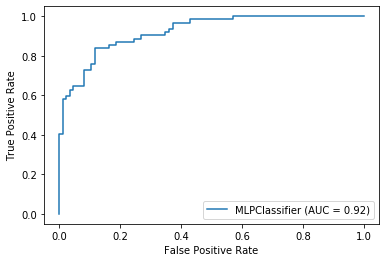

In [407]:
import matplotlib.pyplot as plt  
from sklearn import metrics
metrics.plot_roc_curve(clf_5, xtest, ytest) 
plt.show()

In [404]:
internal_layer = 100
from sklearn.neural_network import MLPClassifier

for i in range(1,internal_layer):
    print("----------- i:",i)
    clf_5 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(i,2),random_state=0,max_iter=10000)
    clf_5.fit(xtrain,ytrain)
    test(clf_5,xtest,ytest)

----------- i: 1
Confusion Matrix : 
[[128  39]
 [ 21 108]]

 Prediction Accuracy :  0.7972972972972973
------------------------
----------- i: 2
Confusion Matrix : 
[[125  42]
 [ 21 108]]

 Prediction Accuracy :  0.7871621621621622
------------------------
----------- i: 3
Confusion Matrix : 
[[136  31]
 [ 25 104]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 4
Confusion Matrix : 
[[137  30]
 [ 24 105]]

 Prediction Accuracy :  0.8175675675675675
------------------------
----------- i: 5
Confusion Matrix : 
[[137  30]
 [ 24 105]]

 Prediction Accuracy :  0.8175675675675675
------------------------
----------- i: 6
Confusion Matrix : 
[[137  30]
 [ 26 103]]

 Prediction Accuracy :  0.8108108108108109
------------------------
----------- i: 7
Confusion Matrix : 
[[144  23]
 [ 28 101]]

 Prediction Accuracy :  0.8277027027027027
------------------------
----------- i: 8
Confusion Matrix : 
[[142  25]
 [ 26 103]]

 Prediction Accuracy :  0.8277027027

Confusion Matrix : 
[[141  26]
 [ 25 104]]

 Prediction Accuracy :  0.8277027027027027
------------------------
----------- i: 65
Confusion Matrix : 
[[140  27]
 [ 25 104]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 66
Confusion Matrix : 
[[143  24]
 [ 28 101]]

 Prediction Accuracy :  0.8243243243243243
------------------------
----------- i: 67
Confusion Matrix : 
[[138  29]
 [ 24 105]]

 Prediction Accuracy :  0.8209459459459459
------------------------
----------- i: 68
Confusion Matrix : 
[[138  29]
 [ 24 105]]

 Prediction Accuracy :  0.8209459459459459
------------------------
----------- i: 69
Confusion Matrix : 
[[135  32]
 [ 26 103]]

 Prediction Accuracy :  0.8040540540540541
------------------------
----------- i: 70
Confusion Matrix : 
[[141  26]
 [ 28 101]]

 Prediction Accuracy :  0.8175675675675675
------------------------
----------- i: 71
Confusion Matrix : 
[[138  29]
 [ 25 104]]

 Prediction Accuracy :  0.8175675675675675
---

## Optimize SVM!!!

## NEXT 

#### Multiple classes

In [412]:
books_conf.groupby("helpfulness").describe()

_unit_id                                             \
                    count          mean            std           min   
helpfulness                                                            
helpful             818.0  2.905689e+09  123701.993296  2.905524e+09   
not_helpful         170.0  2.905686e+09  125020.057945  2.905524e+09   
somewhat_helpful    410.0  2.905687e+09  124592.898421  2.905524e+09   
unrelated            82.0  2.905707e+09  118164.562782  2.905524e+09   

                                                                          \
                           25%           50%           75%           max   
helpfulness                                                                
helpful           2.905524e+09  2.905774e+09  2.905788e+09  2.905789e+09   
not_helpful       2.905524e+09  2.905774e+09  2.905788e+09  2.905789e+09   
somewhat_helpful  2.905524e+09  2.905774e+09  2.905788e+09  2.905789e+09   
unrelated         2.905525e+09  2.905774e+09  2.905789e+09  2.905789e+09   

                 _trusted_judgments       ... confidence          no  \
                              count mean  ...        75%  max  count   
helpfulness                               ...                          
helpful                       818.0  3.0  ...     1.0000  1.0  818.0   
not_helpful                   170.0  3.0  ...     0.6804  1.0  170.0   
somewhat_helpful              410.0  3.0  ...     0.6735  1.0  410.0   
unrelated                      82.0  3.0  ...     0.6667  1.0   82.0   

                                                                        \
                          mean           std    min       25%      50%   
helpfulness                                                              
helpful           31966.860636  19249.769394    2.0  15476.00  30454.0   
not_helpful       33127.300000  18611.412259  250.0  17520.50  33595.5   
somewhat_helpful  34747.902439  18893.307124  355.0  18655.75  36539.5   
unrelated         37453.012195  19557.137107  220.0  18953.00  40609.5   

                                    
                      75%      max  
helpfulness                         
helpful           48184.0  65515.0  
not_helpful       49844.0  65523.0  
somewhat_helpful  50643.5  65498.0  
unrelated         54002.0  63941.0  

[4 rows x 32 columns]

In [432]:
classes_conf_4 = books_conf["helpfulness"]

In [415]:
#select best # of features

sel_k_4 = SelectKBest(chi2, k=20)
f_kbest_k_4 = sel_k.fit_transform(features_conf_st_sc, classes_conf_4)

####### Build the model 

#Create Labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classes_conf_4)
print("Classes found : ", le.classes_)

#Convert classes to integers for use with ML
int_classes_4 = le.transform(classes_conf_4)
print("\nClasses converted to integers :", int_classes)

from sklearn.model_selection import train_test_split

#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k_4, int_classes_4,random_state=1,test_size=0.1)

Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [1 1 0 ... 0 1 1]


In [416]:
clf_6 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,2),random_state=0,max_iter=10000)
clf_6.fit(xtrain,ytrain)
test(clf_6,xtest,ytest)

Confusion Matrix : 
[[76  0 10  0]
 [ 2  8  5  0]
 [10  7 23  0]
 [ 0  3  4  0]]

 Prediction Accuracy :  0.722972972972973
------------------------


(array([[76,  0, 10,  0],
        [ 2,  8,  5,  0],
        [10,  7, 23,  0],
        [ 0,  3,  4,  0]]),
 0.722972972972973)

In [429]:
ex_with_best_k(features_conf_st_sc,classes_conf_4,200)

k = ----------  1
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[158   0  60   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[158   0  60   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6081081081081081
------------------------
NN
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188   0  30   0]
 [  6   0  35   0]
 [ 35   0  65   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6837837837837838
------------------------
k = ----------  4
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[152  15  49   2]
 [  5  21  14   1]
 [ 31  22  45   2]
 [  3   5   3   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Random Forest
Confusion Matrix : 
[[199   0  19   0]
 [  8   0  33   0]
 [ 42   0  58   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193   0  25   0]
 [  5   0  36   0]
 [ 37   0  63   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  7
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[155  12  45   6]
 [  7  12  20   2]
 [ 37  15  40   8]
 [  2   0   8   1]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185   3  30   0]
 [  6  20  15   0]
 [ 31  14  55   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  10
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Decision Tree
Confusion Matrix : 
[[159  11  46   2]
 [ 10   7  20   4]
 [ 38  19  33  10]
 [  2   2   6   1]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[187   0  31   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6891891891891891
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186   1  31   0]
 [  5  18  18   0]
 [ 33  14  53   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  12
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[216   0   2   0]
 [ 21   0  20   0]
 [ 81   0  19   0]
 [  6   0   5   0]]

 Prediction Accuracy :  0.6351351351351351
------------------------
Decision Tree
Confusion Matrix : 
[[167  10  37   4]
 [  9   6  21   5]
 [ 40  20  26  14]
 [  2   3   5   1]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182   2  34   0]
 [  5  18  18   0]
 [ 29  14  57   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  13
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[209   0   9   0]
 [ 13   0  28   0]
 [ 59   0  41   0]
 [  5   0   6   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[167   7  41   3]
 [  8  11  17   5]
 [ 32  20  36  12]
 [  2   3   6   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[189   0  29   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183   1  34   0]
 [  5  12  24   0]
 [ 31   5  64   0]
 [  1   4   6   0]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  14
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
Decision Tree
Confusion Matrix : 
[[164  15  36   3]
 [  7  12  18   4]
 [ 41  14  38   7]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191   1  26   0]
 [  7  15  19   0]
 [ 33   9  58   0]
 [  0   3   8   0]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  16
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[186   0  32   0]
 [  5   0  36   0]
 [ 32   0  68   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Decision Tree
Confusion Matrix : 
[[164   7  40   7]
 [ 10  11  16   4]
 [ 32  22  37   9]
 [  1   4   5   1]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[188   0  30   0]
 [  6   0  35   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6891891891891891
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187   2  29   0]
 [  7  19  15   0]
 [ 34  11  55   0]
 [  2   5   4   0]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  17
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[178   0  40   0]
 [  4   0  37   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6864864864864865
------------------------
Decision Tree
Confusion Matrix : 
[[171   7  36   4]
 [  5  12  15   9]
 [ 41  13  34  12]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5918918918918918
------------------------
Random Forest
Confusion Matrix : 
[[187   0  31   0]
 [  6   0  35   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188   4  26   0]
 [  7  23  11   0]
 [ 31  16  53   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  19
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  3   0  38   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[168   9  39   2]
 [  5  12  15   9]
 [ 39  17  34  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[188   0  30   0]
 [  5   0  36   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[191   2  25   0]
 [  4  21  16   0]
 [ 28  11  61   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.7378378378378379
------------------------
k = ----------  20
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[168  11  38   1]
 [  5  13  13  10]
 [ 36  15  37  12]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[186   0  32   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6864864864864865
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189   5  24   0]
 [  3  20  18   0]
 [ 28  15  57   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7189189189189189
------------------------
k = ----------  23
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[163   0  55   0]
 [  3   0  38   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[160   8  49   1]
 [  6  12  13  10]
 [ 35  18  35  12]
 [  1   2   6   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 30   0  70   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183   3  32   0]
 [  4  21  16   0]
 [ 25  19  56   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7027027027027027
------------------------
k = ----------  25
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[164   0  54   0]
 [  2   0  39   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[156   9  50   3]
 [  5  10  18   8]
 [ 38  20  30  12]
 [  2   2   6   1]]

 Prediction Accuracy :  0.5324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[190   0  28   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188   2  28   0]
 [  3  21  17   0]
 [ 29  15  56   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7162162162162162
------------------------
k = ----------  29
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[157   2  57   2]
 [  4   8  21   8]
 [ 35  16  37  12]
 [  2   4   4   1]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 31   0  69   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7054054054054054
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[193   5  20   0]
 [  4  20  17   0]
 [ 35  14  51   0]
 [  1   3   7   0]]

 Prediction Accuracy :  0.7135135135135136
------------------------
k = ----------  30
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[154   4  58   2]
 [  3   9  21   8]
 [ 34  16  39  11]
 [  2   4   4   1]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[189   0  29   0]
 [  6   0  35   0]
 [ 30   0  70   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[188   1  29   0]
 [  6  19  16   0]
 [ 34  15  51   0]
 [  0   3   8   0]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  31
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[151   7  57   3]
 [  2  10  23   6]
 [ 33  17  39  11]
 [  1   4   5   1]]

 Prediction Accuracy :  0.5432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  6   0  35   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184   4  30   0]
 [  3  20  18   0]
 [ 31  23  46   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  34
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6459459459459459
------------------------
Decision Tree
Confusion Matrix : 
[[154  11  51   2]
 [  3  10  21   7]
 [ 41  19  32   8]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5297297297297298
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[187   5  26   0]
 [  4  19  18   0]
 [ 29  19  52   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  35
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6459459459459459
------------------------
Decision Tree
Confusion Matrix : 
[[150   8  57   3]
 [  1  11  19  10]
 [ 41  19  32   8]
 [  2   5   3   1]]

 Prediction Accuracy :  0.5243243243243243
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185   3  30   0]
 [  4  22  15   0]
 [ 26  18  56   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  37
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[156   7  52   3]
 [  4  11  17   9]
 [ 42  19  30   9]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181   2  35   0]
 [  4  21  16   0]
 [ 25  16  59   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  38
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6459459459459459
------------------------
Decision Tree
Confusion Matrix : 
[[150   9  55   4]
 [  2  10  20   9]
 [ 42  20  28  10]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183   2  33   0]
 [  2  22  17   0]
 [ 28  17  55   0]
 [  0   3   7   1]]

 Prediction Accuracy :  0.7054054054054054
------------------------
k = ----------  39
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[153   8  55   2]
 [  4  10  21   6]
 [ 37  19  33  11]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5297297297297298
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186   1  31   0]
 [  5  20  16   0]
 [ 22  14  64   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.7297297297297297
------------------------
k = ----------  40
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[151   6  59   2]
 [  3  11  19   8]
 [ 34  20  34  12]
 [  2   5   3   1]]

 Prediction Accuracy :  0.5324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185   5  28   0]
 [  6  20  15   0]
 [ 29  17  54   0]
 [  1   4   6   0]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  42
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[158   8  50   2]
 [  4  10  21   6]
 [ 41  17  29  13]
 [  2   5   3   1]]

 Prediction Accuracy :  0.5351351351351351
------------------------
Random Forest
Confusion Matrix : 
[[189   0  29   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
NN
C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[186   3  29   0]
 [  6  21  14   0]
 [ 31  13  56   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.7108108108108108
------------------------
k = ----------  44
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[162   5  49   2]
 [  1  12  21   7]
 [ 37  18  35  10]
 [  2   5   3   1]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[185   1  32   0]
 [  6  21  14   0]
 [ 25  14  61   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.7216216216216216
------------------------
k = ----------  47
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[166   5  45   2]
 [  1  13  20   7]
 [ 39  16  35  10]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180   3  35   0]
 [  5  18  18   0]
 [ 26  18  56   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6864864864864865
------------------------
k = ----------  48
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  50   3]
 [  1  12  21   7]
 [ 37  18  37   8]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  6   0  35   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184   2  30   2]
 [  5  19  17   0]
 [ 26  12  58   4]
 [  0   4   6   1]]

 Prediction Accuracy :  0.7081081081081081
------------------------
k = ----------  51
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[160   4  50   4]
 [  3  13  19   6]
 [ 37  17  37   9]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[183   2  33   0]
 [  6  20  15   0]
 [ 24  20  56   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.7
------------------------
k = ----------  53
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[160   5  50   3]
 [  5  12  16   8]
 [ 37  17  37   9]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175   3  40   0]
 [  6  19  16   0]
 [ 23  19  58   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6810810810810811
------------------------
k = ----------  54
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[155   4  53   6]
 [  4  13  18   6]
 [ 37  18  35  10]
 [  2   5   4   0]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178   4  36   0]
 [  5  15  21   0]
 [ 27  12  61   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6864864864864865
------------------------
k = ----------  56
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[218   0   0   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  49   4]
 [  4  12  19   6]
 [ 35  17  38  10]
 [  0   5   5   1]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177   4  37   0]
 [  5  21  15   0]
 [ 25  17  58   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  57
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[161   4  50   3]
 [  2  14  18   7]
 [ 40  16  34  10]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[180   2  36   0]
 [  6  20  15   0]
 [ 27  16  57   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  59
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[164   3  49   2]
 [  2  12  19   8]
 [ 38  17  35  10]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  9   0  32   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   1  44   0]
 [  6  19  16   0]
 [ 27  13  60   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6810810810810811
------------------------
k = ----------  60
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[160   6  50   2]
 [  4  13  17   7]
 [ 37  18  35  10]
 [  2   5   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  6   0  35   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174   3  41   0]
 [  4  18  19   0]
 [ 29  14  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  61
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[165   4  47   2]
 [  3  12  19   7]
 [ 37  19  35   9]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
---------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182   2  34   0]
 [  3  21  17   0]
 [ 31  15  54   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
k = ----------  62
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[154   6  52   6]
 [  5  13  16   7]
 [ 38  16  37   9]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   1  38   0]
 [  3  17  21   0]
 [ 28  12  60   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  64
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[162   8  46   2]
 [  4  10  21   6]
 [ 39  14  35  12]
 [  0   5   6   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   3  42   0]
 [  4  17  20   0]
 [ 28  18  54   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
k = ----------  66
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [100   0   0   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  50   3]
 [  4  10  21   6]
 [ 37  15  39   9]
 [  0   5   5   1]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[189   0  29   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178   2  38   0]
 [  4  20  17   0]
 [ 26  23  51   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  67
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[157   4  54   3]
 [  3  12  20   6]
 [ 37  16  38   9]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   6  33   0]
 [  5  19  17   0]
 [ 30  20  50   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  69
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[161   5  50   2]
 [  4  12  18   7]
 [ 37  15  37  11]
 [  0   6   5   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 32   0  68   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177   2  39   0]
 [  4  18  19   0]
 [ 31  18  51   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
k = ----------  70
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[166   7  43   2]
 [  5  12  19   5]
 [ 35  21  32  12]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181   2  35   0]
 [  5  21  15   0]
 [ 27  20  53   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6891891891891891
------------------------
k = ----------  71
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[164   5  47   2]
 [  4   9  20   8]
 [ 35  18  36  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   3  44   0]
 [  4  13  24   0]
 [ 27  16  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
k = ----------  72
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[163   7  46   2]
 [  4  13  17   7]
 [ 37  15  37  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   3  36   0]
 [  5  18  18   0]
 [ 26  15  59   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6918918918918919
------------------------
k = ----------  73
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[166   7  43   2]
 [  2  12  20   7]
 [ 37  19  35   9]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 31   0  69   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175   2  41   0]
 [  4  21  16   0]
 [ 28  19  53   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  75
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[159   7  49   3]
 [  2  12  21   6]
 [ 32  18  39  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178   5  35   0]
 [  1  21  19   0]
 [ 30  18  52   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6783783783783783
------------------------
k = ----------  76
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[162   8  45   3]
 [  4   8  21   8]
 [ 36  18  33  13]
 [  0   6   5   0]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170   7  41   0]
 [  4  19  18   0]
 [ 24  16  60   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  77
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[154  10  50   4]
 [  1  14  19   7]
 [ 32  19  35  14]
 [  0   5   6   0]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   1  46   0]
 [  3  20  18   0]
 [ 29  15  56   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
k = ----------  78
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[161   8  46   3]
 [  0  13  21   7]
 [ 34  20  36  10]
 [  0   6   5   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175   2  41   0]
 [  4  20  17   0]
 [ 30  15  55   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  79
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[168   6  41   3]
 [  3  10  20   8]
 [ 39  16  34  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
---------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   5  42   0]
 [  4  21  16   0]
 [ 27  17  56   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  80
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[217   0   1   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[166   8  41   3]
 [  3  14  18   6]
 [ 37  19  33  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165   8  45   0]
 [  5  23  13   0]
 [ 28  20  52   0]
 [  0   7   4   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  81
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[216   0   2   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[153   8  52   5]
 [  5  12  18   6]
 [ 36  19  35  10]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177   5  36   0]
 [  4  20  17   0]
 [ 32  17  51   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  82
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   1   2   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[162   7  45   4]
 [  2  10  21   8]
 [ 35  19  35  11]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[172   5  41   0]
 [  4  20  17   0]
 [ 28  17  55   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
k = ----------  83
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   1   2   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[166   8  41   3]
 [  3  12  18   8]
 [ 38  17  33  12]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174   4  40   0]
 [  4  20  17   0]
 [ 25  16  59   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6837837837837838
------------------------
k = ----------  84
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   1   2   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[157   6  52   3]
 [  2   9  21   9]
 [ 37  19  34  10]
 [  0   5   6   0]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   7  47   0]
 [  5  19  17   0]
 [ 28  17  55   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6432432432432432
------------------------
k = ----------  85
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   0   3   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[164   6  45   3]
 [  4  13  19   5]
 [ 36  20  32  12]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 34   0  66   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176   4  38   0]
 [  4  19  18   0]
 [ 32  19  49   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
k = ----------  86
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   0   3   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[159   8  47   4]
 [  1  13  22   5]
 [ 33  18  39  10]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  8   0  33   0]
 [ 32   0  68   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[189   1  28   0]
 [  5  22  14   0]
 [ 31  21  47   1]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6972972972972973
------------------------
k = ----------  87
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   1   3   0]
 [ 41   0   0   0]
 [ 99   0   1   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[159   7  49   3]
 [  4  11  19   7]
 [ 37  19  32  12]
 [  0   6   5   0]]

 Prediction Accuracy :  0.5459459459459459
------------------------
Random Forest
Confusion Matrix : 
[[190   0  28   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168   3  47   0]
 [  4  21  16   0]
 [ 28  15  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
k = ----------  88
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   1   2   0]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[155   6  52   5]
 [  4  10  21   6]
 [ 34  19  37  10]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5459459459459459
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  6   0  35   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   2  43   0]
 [  4  21  16   0]
 [ 30  25  45   0]
 [  1   8   2   0]]

 Prediction Accuracy :  0.6459459459459459
------------------------
k = ----------  89
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   0   3   0]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[161   9  45   3]
 [  2  10  23   6]
 [ 32  18  40  10]
 [  0   5   6   0]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174   8  36   0]
 [  3  17  21   0]
 [ 28  15  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
k = ----------  90
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   0   4   0]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[161   5  49   3]
 [  2  10  21   8]
 [ 34  18  36  12]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177   8  33   0]
 [  4  20  17   0]
 [ 29  19  52   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  91
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   0   4   0]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[154   7  54   3]
 [  3  13  19   6]
 [ 30  21  38  11]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN
C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   3  42   0]
 [  4  20  17   0]
 [ 28  20  52   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
k = ----------  93
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   0   3   1]
 [ 41   0   0   0]
 [ 98   0   2   0]
 [ 11   0   0   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[173   0  45   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
Decision Tree
Confusion Matrix : 
[[161   6  48   3]
 [  3  12  20   6]
 [ 37  18  33  12]
 [  1   5   5   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  6   0  35   0]
 [ 32   0  68   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7081081081081081
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[175   1  42   0]
 [  4  22  15   0]
 [ 27  20  53   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  96
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[213   0   4   1]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Decision Tree
Confusion Matrix : 
[[166   7  43   2]
 [  4  10  21   6]
 [ 33  19  37  11]
 [  1   6   4   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   2  37   0]
 [  4  21  16   0]
 [ 33  22  45   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
k = ----------  97
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[213   0   4   1]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Decision Tree
Confusion Matrix : 
[[163  10  43   2]
 [  3  13  20   5]
 [ 30  21  39  10]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   5  34   0]
 [  5  16  20   0]
 [ 27  16  57   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6810810810810811
------------------------
k = ----------  98
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[214   0   4   0]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[160  11  46   1]
 [  6  15  17   3]
 [ 35  24  35   6]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   4  43   0]
 [  3  21  17   0]
 [ 31  16  53   0]
 [  0   7   4   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
k = ----------  100
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[215   0   3   0]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[161   9  46   2]
 [  5  12  20   4]
 [ 32  21  40   7]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------
NN

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   9  45   0]
 [  1  19  21   0]
 [ 25  23  52   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6351351351351351
------------------------
k = ----------  102
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[213   0   5   0]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[160   8  47   3]
 [  3  10  21   7]
 [ 34  21  37   8]
 [  0   5   5   1]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   3  44   0]
 [  2  17  22   0]
 [ 31  17  52   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  103
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[213   0   5   0]
 [ 40   0   1   0]
 [ 97   0   3   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[163   9  43   3]
 [  5  11  18   7]
 [ 32  20  37  11]
 [  2   4   4   1]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167   7  44   0]
 [  4  21  16   0]
 [ 30  30  39   1]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6135135135135135
------------------------
k = ----------  105
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[209   0   9   0]
 [ 39   0   2   0]
 [ 96   0   4   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   7  50   2]
 [  1  11  20   9]
 [ 34  18  38  10]
 [  1   5   3   2]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176   4  38   0]
 [  4  21  16   0]
 [ 29  17  54   0]
 [  0   4   7   0]]

 Prediction Accuracy :  0.6783783783783783
------------------------
k = ----------  106
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 39   0   2   0]
 [ 96   0   4   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[157   9  49   3]
 [  2  11  19   9]
 [ 35  21  34  10]
 [  0   6   4   1]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   6  39   0]
 [  3  21  17   0]
 [ 29  22  49   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
k = ----------  107
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[211   0   7   0]
 [ 39   0   2   0]
 [ 96   0   4   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   5  51   3]
 [  0  10  22   9]
 [ 35  19  37   9]
 [  2   4   3   2]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   5  42   0]
 [  4  23  13   1]
 [ 24  21  55   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.672972972972973
------------------------
k = ----------  109
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 39   0   2   0]
 [ 95   0   4   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[148   7  60   3]
 [  2   9  21   9]
 [ 34  18  40   8]
 [  2   4   4   1]]

 Prediction Accuracy :  0.5351351351351351
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  8   0  33   0]
 [ 33   0  67   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178   6  34   0]
 [  3  21  17   0]
 [ 30  26  44   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
k = ----------  110
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[209   0   9   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 23   0  77   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[162  11  43   2]
 [  2  10  20   9]
 [ 34  24  33   9]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  13  41   0]
 [  6  19  16   0]
 [ 23  23  54   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
k = ----------  111
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[209   0   9   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 23   0  77   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6702702702702703
------------------------
Decision Tree
Confusion Matrix : 
[[157  11  46   4]
 [  4  10  18   9]
 [ 33  20  40   7]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165   6  47   0]
 [  6  21  14   0]
 [ 27  15  58   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
k = ----------  112
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[161   5  48   4]
 [  2  12  19   8]
 [ 36  23  36   5]
 [  0   6   4   1]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 33   0  67   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7081081081081081
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160   5  53   0]
 [  4  20  17   0]
 [ 29  29  42   0]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6
------------------------
k = ----------  113
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[151   8  52   7]
 [  1  12  20   8]
 [ 34  21  39   6]
 [  0   4   4   3]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   6  41   0]
 [  4  14  22   1]
 [ 25  18  55   2]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  114
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   0   8   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[172   0  46   0]
 [  1   0  40   0]
 [ 22   0  78   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[155   6  53   4]
 [  3  10  20   8]
 [ 34  19  41   6]
 [  1   5   4   1]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 33   0  67   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7054054054054054
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  13  43   0]
 [  5  20  16   0]
 [ 31  22  47   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  116
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[210   1   7   0]
 [ 38   0   3   0]
 [ 93   0   6   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  2   0  39   0]
 [ 21   0  79   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
Decision Tree
Confusion Matrix : 
[[148   6  57   7]
 [  1  12  20   8]
 [ 33  18  41   8]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[167   3  46   2]
 [  4  14  20   3]
 [ 28  18  49   5]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6216216216216216
------------------------
k = ----------  120
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[209   1   7   1]
 [ 37   0   4   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  2   0  39   0]
 [ 23   0  77   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  50   3]
 [  2  13  18   8]
 [ 37  15  38  10]
 [  1   7   2   1]]

 Prediction Accuracy :  0.5702702702702702
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  14  38   0]
 [  4  15  22   0]
 [ 27  18  55   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6378378378378379
------------------------
k = ----------  122
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[208   2   7   1]
 [ 37   0   4   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[155   7  53   3]
 [  1  12  21   7]
 [ 35  18  38   9]
 [  1   7   2   1]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  6   0  35   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176   3  38   1]
 [  4  19  18   0]
 [ 30  19  51   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
k = ----------  123
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[208   2   7   1]
 [ 37   0   4   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[160   9  46   3]
 [  0  14  19   8]
 [ 37  15  39   9]
 [  0   4   3   4]]

 Prediction Accuracy :  0.5864864864864865
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170   5  43   0]
 [  4  20  17   0]
 [ 30  20  50   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  124
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[207   2   8   1]
 [ 37   0   4   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[165   4  45   4]
 [  1  11  21   8]
 [ 33  15  41  11]
 [  0   5   3   3]]

 Prediction Accuracy :  0.5945945945945946
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[173   8  37   0]
 [  8  12  21   0]
 [ 29  23  48   0]
 [  0   6   5   0]]

 Prediction Accuracy :  0.6297297297297297
------------------------
k = ----------  125
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[206   3   8   1]
 [ 37   1   3   0]
 [ 91   0   8   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  50   3]
 [  5   9  17  10]
 [ 30  20  42   8]
 [  1   5   2   3]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171   6  41   0]
 [  5  16  16   4]
 [ 31  20  48   1]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6351351351351351
------------------------
k = ----------  126
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[206   2   8   2]
 [ 37   1   3   0]
 [ 90   0   9   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  2   0  39   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[151   7  54   6]
 [  7  11  16   7]
 [ 34  24  35   7]
 [  2   5   1   3]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169   5  44   0]
 [  7  17  17   0]
 [ 25  19  56   0]
 [  2   3   6   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
k = ----------  127
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[205   2   9   2]
 [ 37   1   3   0]
 [ 89   0  10   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[160   7  48   3]
 [  4  12  18   7]
 [ 37  15  42   6]
 [  1   2   3   5]]

 Prediction Accuracy :  0.5918918918918918
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165   8  45   0]
 [  6  15  20   0]
 [ 33  18  49   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  128
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[205   1  10   2]
 [ 38   1   2   0]
 [ 89   0  10   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[157   8  48   5]
 [  2  17  15   7]
 [ 30  16  46   8]
 [  0   2   4   5]]

 Prediction Accuracy :  0.6081081081081081
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  6   0  35   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  15  42   0]
 [  6  18  17   0]
 [ 25  19  56   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6351351351351351
------------------------
k = ----------  129
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[204   1  11   2]
 [ 37   1   3   0]
 [ 89   0  10   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[165   8  42   3]
 [  6  11  17   7]
 [ 29  17  48   6]
 [  1   2   3   5]]

 Prediction Accuracy :  0.6189189189189189
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6891891891891891
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169   7  42   0]
 [  6  19  16   0]
 [ 24  24  52   0]
 [  2   4   5   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
k = ----------  130
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[205   1  10   2]
 [ 38   1   2   0]
 [ 90   0   9   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  2   0  39   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[157  11  47   3]
 [  6  12  17   6]
 [ 34  17  43   6]
 [  1   4   3   3]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [ 10   0  31   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
---------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174   1  42   1]
 [  8  16  15   2]
 [ 34  13  47   6]
 [  0   5   5   1]]

 Prediction Accuracy :  0.6432432432432432
------------------------
k = ----------  131
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[204   1  11   2]
 [ 38   1   2   0]
 [ 88   0  11   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  2   0  39   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6675675675675675
------------------------
Decision Tree
Confusion Matrix : 
[[157  12  45   4]
 [  4  13  17   7]
 [ 28  19  46   7]
 [  1   5   3   2]]

 Prediction Accuracy :  0.5891891891891892
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [ 10   0  31   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  13  36   0]
 [  5  20  16   0]
 [ 26  20  54   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
k = ----------  133
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[203   1  12   2]
 [ 38   1   2   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[149  10  50   9]
 [  4  12  18   7]
 [ 32  14  45   9]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  7   0  34   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156   2  57   3]
 [  9  16  13   3]
 [ 30  17  49   4]
 [  1   4   4   2]]

 Prediction Accuracy :  0.6027027027027027
------------------------
k = ----------  134
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[203   1  12   2]
 [ 38   1   2   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[151   6  55   6]
 [  2  13  19   7]
 [ 32  14  46   8]
 [  0   4   5   2]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  11  38   0]
 [  4  17  20   0]
 [ 26  19  55   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
k = ----------  135
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[202   1  13   2]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6648648648648648
------------------------
Decision Tree
Confusion Matrix : 
[[158   8  45   7]
 [  3  14  17   7]
 [ 32  18  42   8]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[178  10  28   2]
 [  5  16  14   6]
 [ 36  17  43   4]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
k = ----------  136
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  14   1]
 [ 38   2   1   0]
 [ 88   0  11   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  1   0  40   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[154   8  47   9]
 [  4  12  19   6]
 [ 32  15  46   7]
 [  0   3   5   3]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[197   0  21   0]
 [  9   0  32   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[179   7  30   2]
 [  9  12  20   0]
 [ 35  21  42   2]
 [  1   4   5   1]]

 Prediction Accuracy :  0.6324324324324324
------------------------
k = ----------  139
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  14   1]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[155  10  48   5]
 [  5  11  20   5]
 [ 29  22  44   5]
 [  1   4   4   2]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[198   0  20   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7081081081081081
---------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  14  43   0]
 [  5  21  15   0]
 [ 30  18  52   0]
 [  0   9   2   0]]

 Prediction Accuracy :  0.6324324324324324
------------------------
k = ----------  140
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  14   1]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[159   9  43   7]
 [  4  14  14   9]
 [ 32  16  46   6]
 [  0   5   4   2]]

 Prediction Accuracy :  0.5972972972972973
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  12  37   0]
 [  7  12  22   0]
 [ 32  13  55   0]
 [  1   4   6   0]]

 Prediction Accuracy :  0.6378378378378379
------------------------
k = ----------  141
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  13   2]
 [ 38   1   1   1]
 [ 87   1  12   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[150   9  54   5]
 [  3  15  15   8]
 [ 29  17  47   7]
 [  0   5   5   1]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   6  46   2]
 [  5  15  11  10]
 [ 32  23  41   4]
 [  1   3   3   4]]

 Prediction Accuracy :  0.6054054054054054
------------------------
k = ----------  142
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[201   2  13   2]
 [ 38   1   1   1]
 [ 87   1  12   0]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  1   0  40   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[156   7  51   4]
 [  3  12  14  12]
 [ 32  15  44   9]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  12  38   0]
 [  5  18  18   0]
 [ 29  28  43   0]
 [  2   4   5   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  143
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[198   2  16   2]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  2   0  39   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6621621621621622
------------------------
Decision Tree
Confusion Matrix : 
[[151  10  54   3]
 [  3  12  18   8]
 [ 29  20  43   8]
 [  0   5   4   2]]

 Prediction Accuracy :  0.5621621621621622
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  13  44   0]
 [  4  15  22   0]
 [ 24  21  55   0]
 [  1   4   6   0]]

 Prediction Accuracy :  0.6243243243243243
------------------------
k = ----------  144
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[198   2  16   2]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  4   0  37   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[153   7  51   7]
 [  5  15  13   8]
 [ 32  18  43   7]
 [  1   5   3   2]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  10  47   1]
 [  8  15  18   0]
 [ 33  18  49   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6054054054054054
------------------------
k = ----------  145
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[198   2  16   2]
 [ 38   2   1   0]
 [ 87   0  12   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  4   0  37   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[152   9  49   8]
 [  4  15  15   7]
 [ 32  20  39   9]
 [  0   3   5   3]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[169  16  33   0]
 [  9  17  15   0]
 [ 30  24  46   0]
 [  0   8   3   0]]

 Prediction Accuracy :  0.6270270270270271
------------------------
k = ----------  146
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[197   2  17   2]
 [ 38   2   1   0]
 [ 86   0  13   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[165   0  53   0]
 [  3   0  38   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[153   9  50   6]
 [  7  15  13   6]
 [ 31  14  43  12]
 [  1   4   3   3]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[174  11  31   2]
 [  6  18  14   3]
 [ 29  22  43   6]
 [  2   6   1   2]]

 Prediction Accuracy :  0.6405405405405405
------------------------
k = ----------  147
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[197   2  17   2]
 [ 38   2   1   0]
 [ 85   0  14   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5756756756756757
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  3   0  38   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[156   8  49   5]
 [  6  13  16   6]
 [ 29  20  41  10]
 [  0   4   5   2]]

 Prediction Accuracy :  0.572972972972973
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  12  43   0]
 [  5  15  21   0]
 [ 29  30  41   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.5918918918918918
------------------------
k = ----------  148
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[196   2  18   2]
 [ 38   2   1   0]
 [ 85   0  14   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  3   0  38   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[157  10  46   5]
 [  8  14  12   7]
 [ 34  17  36  13]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160   8  47   3]
 [  7  18  12   4]
 [ 37  20  40   3]
 [  2   5   2   2]]

 Prediction Accuracy :  0.5945945945945946
------------------------
k = ----------  150
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[195   2  19   2]
 [ 37   2   2   0]
 [ 84   2  13   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  3   0  38   0]
 [ 24   0  76   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[152   8  53   5]
 [  5  17  12   7]
 [ 34  19  37  10]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5648648648648649
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7027027027027027
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  10  45   0]
 [  7  24  10   0]
 [ 33  30  37   0]
 [  2   5   4   0]]

 Prediction Accuracy :  0.6054054054054054
------------------------
k = ----------  151
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[194   2  20   2]
 [ 37   2   2   0]
 [ 83   2  14   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[166   0  52   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[154   7  48   9]
 [  6  16  12   7]
 [ 30  16  42  12]
 [  1   3   4   3]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  6   0  35   0]
 [ 33   0  67   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164  14  40   0]
 [  6  17  18   0]
 [ 24  25  51   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6270270270270271
------------------------
k = ----------  152
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   2  25   1]
 [ 35   2   4   0]
 [ 81   2  16   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[153   7  50   8]
 [  4  16  13   8]
 [ 35  17  37  11]
 [  1   3   3   4]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  22  34   0]
 [  6  14  21   0]
 [ 29  20  51   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.6135135135135135
------------------------
k = ----------  153
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   2  25   1]
 [ 35   2   4   0]
 [ 81   2  16   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   6  47   6]
 [  5  14  14   8]
 [ 36  16  37  11]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   4  49   1]
 [  8  13  13   7]
 [ 37  15  37  11]
 [  3   1   4   3]]

 Prediction Accuracy :  0.5864864864864865
------------------------
k = ----------  154
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   2  24   1]
 [ 34   2   5   0]
 [ 80   2  17   1]
 [ 10   0   1   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[155  11  50   2]
 [  5  14  14   8]
 [ 35  19  33  13]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[170  15  33   0]
 [  6  20  15   0]
 [ 37  30  33   0]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6027027027027027
------------------------
k = ----------  158
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   3  24   1]
 [ 34   2   5   0]
 [ 80   2  17   1]
 [  9   0   2   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[162   8  44   4]
 [  4  13  15   9]
 [ 31  17  38  14]
 [  0   3   5   3]]

 Prediction Accuracy :  0.5837837837837838
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182   8  26   2]
 [  5  20  15   1]
 [ 32  19  48   1]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6756756756756757
------------------------
k = ----------  159
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   3  24   1]
 [ 34   2   5   0]
 [ 80   2  17   1]
 [  9   0   2   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[167   0  51   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[158   8  44   8]
 [  4  15  15   7]
 [ 36  22  32  10]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  17  38   0]
 [  8  17  16   0]
 [ 33  25  42   0]
 [  2   5   4   0]]

 Prediction Accuracy :  0.6
------------------------
k = ----------  160
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[190   3  24   1]
 [ 34   2   5   0]
 [ 79   2  18   1]
 [  9   0   2   0]]

 Prediction Accuracy :  0.5675675675675675
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[153   7  56   2]
 [  5  13  12  11]
 [ 35  17  38  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  10  46   6]
 [  8  18  11   4]
 [ 36  18  42   4]
 [  2   5   4   0]]

 Prediction Accuracy :  0.5837837837837838
------------------------
k = ----------  161
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   3  23   1]
 [ 34   2   5   0]
 [ 79   1  19   1]
 [  9   0   2   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[161   8  46   3]
 [  5  14  13   9]
 [ 34  16  38  12]
 [  0   3   6   2]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166  19  33   0]
 [  8  17  16   0]
 [ 34  20  46   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  162
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   3  23   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  9   0   2   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[165   8  41   4]
 [  3  15  16   7]
 [ 34  24  31  11]
 [  0   3   5   3]]

 Prediction Accuracy :  0.5783783783783784
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6945945945945946
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[160  28  30   0]
 [  9  19  13   0]
 [ 36  26  38   0]
 [  1   7   3   0]]

 Prediction Accuracy :  0.5864864864864865
------------------------
k = ----------  163
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   2  24   1]
 [ 33   2   6   0]
 [ 79   2  19   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[155   8  51   4]
 [  3  13  15  10]
 [ 35  19  35  11]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[152  10  50   6]
 [  5  11  20   5]
 [ 36  20  36   8]
 [  2   4   4   1]]

 Prediction Accuracy :  0.5405405405405406
------------------------
k = ----------  164
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   2  24   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[157   7  49   5]
 [  5  14  14   8]
 [ 36  17  36  11]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[192   0  26   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165  23  30   0]
 [  5  28   8   0]
 [ 34  39  27   0]
 [  1   8   2   0]]

 Prediction Accuracy :  0.5945945945945946
------------------------
k = ----------  165
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[191   2  24   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.572972972972973
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[157   6  49   6]
 [  5  15  13   8]
 [ 36  19  35  10]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[176  12  30   0]
 [  9  14  18   0]
 [ 40  18  42   0]
 [  0   5   6   0]]

 Prediction Accuracy :  0.6270270270270271
------------------------
k = ----------  167
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   2  28   1]
 [ 34   2   5   0]
 [ 78   2  20   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[169   0  49   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[156   6  49   7]
 [  4  14  14   9]
 [ 31  22  34  13]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5594594594594594
------------------------
Random Forest
Confusion Matrix : 
[[191   0  27   0]
 [  7   0  34   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6837837837837838
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  11  42   3]
 [  6  21  13   1]
 [ 36  22  41   1]
 [  3   2   6   0]]

 Prediction Accuracy :  0.6054054054054054
------------------------
k = ----------  168
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   2  28   1]
 [ 34   2   5   0]
 [ 78   2  20   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 25   0  75   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[159   8  43   8]
 [  5  17  12   7]
 [ 36  17  37  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162  14  42   0]
 [  9  18  14   0]
 [ 37  34  29   0]
 [  2   6   3   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
k = ----------  169
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[186   2  29   1]
 [ 33   2   6   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[168   0  49   1]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[162   6  43   7]
 [  5  13  13  10]
 [ 37  18  37   8]
 [  1   3   4   3]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  10  46   4]
 [  7  16  11   7]
 [ 37  28  32   3]
 [  1   7   3   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
k = ----------  170
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   2  28   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[168   0  49   1]
 [  4   0  37   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[144  12  58   4]
 [  5  14  14   8]
 [ 38  21  29  12]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5135135135135135
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  9   0  32   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[171  18  29   0]
 [  5  17  19   0]
 [ 31  28  41   0]
 [  4   3   4   0]]

 Prediction Accuracy :  0.6189189189189189
------------------------
k = ----------  171
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   2  28   1]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[168   0  49   1]
 [  4   0  37   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[159  10  45   4]
 [  6  15  12   8]
 [ 35  18  37  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5756756756756757
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[168  15  35   0]
 [  7  21  13   0]
 [ 33  23  44   0]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6297297297297297
------------------------
k = ----------  172
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[187   3  26   2]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[168   0  49   1]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[163  10  41   4]
 [  4  14  15   8]
 [ 33  20  36  11]
 [  1   3   5   2]]

 Prediction Accuracy :  0.581081081081081
------------------------
Random Forest
Confusion Matrix : 
[[197   0  21   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  22  33   0]
 [  7  22  12   0]
 [ 34  29  37   0]
 [  1   5   5   0]]

 Prediction Accuracy :  0.6
------------------------
k = ----------  173
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 77   2  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[167   0  50   1]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[153  10  51   4]
 [  6  13  14   8]
 [ 36  19  36   9]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  14  30  11]
 [  9  17  14   1]
 [ 44  27  23   6]
 [  3   3   4   1]]

 Prediction Accuracy :  0.5513513513513514
------------------------
k = ----------  174
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 78   2  20   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[169   0  48   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[151   9  52   6]
 [  5  13  15   8]
 [ 38  20  31  11]
 [  1   3   4   3]]

 Prediction Accuracy :  0.5351351351351351
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  14  41   0]
 [  6  22  13   0]
 [ 32  20  48   0]
 [  1   3   7   0]]

 Prediction Accuracy :  0.6297297297297297
------------------------
k = ----------  175
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 78   2  20   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[152   8  52   6]
 [  6  13  13   9]
 [ 35  19  36  10]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5486486486486486
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[166   8  41   3]
 [  8  19  13   1]
 [ 36  20  37   7]
 [  2   5   4   0]]

 Prediction Accuracy :  0.6
------------------------
k = ----------  176
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 79   2  19   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[168   0  50   0]
 [  3   0  38   0]
 [ 26   0  74   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[160   7  47   4]
 [  3  14  14  10]
 [ 35  18  34  13]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5675675675675675
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  7   0  34   0]
 [ 36   0  64   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6945945945945946
------------------------
NN


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161   8  45   4]
 [  6  15  13   7]
 [ 34  23  38   5]
 [  3   6   2   0]]

 Prediction Accuracy :  0.5783783783783784
------------------------
k = ----------  178
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[186   3  27   2]
 [ 34   2   5   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
SVM
Confusion Matrix : 
[[166   0  51   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
Decision Tree
Confusion Matrix : 
[[150   9  49  10]
 [  5  13  14   9]
 [ 32  17  37  14]
 [  0   3   6   2]]

 Prediction Accuracy :  0.5459459459459459
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[164   7  40   7]
 [  7  12  17   5]
 [ 38  22  31   9]
 [  1   4   4   2]]

 Prediction Accuracy :  0.5648648648648649
------------------------
k = ----------  179
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 34   2   5   0]
 [ 78   1  21   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[166   0  51   1]
 [  3   0  38   0]
 [ 28   0  72   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[152  10  49   7]
 [  5  11  14  11]
 [ 35  17  35  13]
 [  1   3   5   2]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6972972972972973
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[177  11  23   7]
 [  6  15  14   6]
 [ 38  20  36   6]
 [  2   5   4   0]]

 Prediction Accuracy :  0.6162162162162163
------------------------
k = ----------  181
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   3  29   2]
 [ 33   2   6   0]
 [ 77   1  22   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[167   0  50   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6432432432432432
------------------------
Decision Tree
Confusion Matrix : 
[[152   9  52   5]
 [  6  11  14  10]
 [ 36  20  33  11]
 [  1   4   5   1]]

 Prediction Accuracy :  0.5324324324324324
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  8   0  33   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[165   3  41   9]
 [  6  14  17   4]
 [ 40  15  39   6]
 [  1   2   5   3]]

 Prediction Accuracy :  0.5972972972972973
------------------------
k = ----------  182
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   3  29   2]
 [ 33   2   6   0]
 [ 77   1  22   0]
 [  8   0   3   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[170   0  47   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[155   6  52   5]
 [  5  13  13  10]
 [ 33  23  33  11]
 [  1   2   4   4]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[163  25  30   0]
 [  6  26   9   0]
 [ 37  33  30   0]
 [  0   8   3   0]]

 Prediction Accuracy :  0.5918918918918918
------------------------
k = ----------  184
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   3  29   2]
 [ 33   2   6   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[170   0  47   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[151   8  52   7]
 [  3  12  14  12]
 [ 32  20  37  11]
 [  1   4   5   1]]

 Prediction Accuracy :  0.5432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  3   0   8   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[157  25  36   0]
 [  7  25   9   0]
 [ 40  27  33   0]
 [  2   7   2   0]]

 Prediction Accuracy :  0.581081081081081
------------------------
k = ----------  186
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   4  30   2]
 [ 33   2   6   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[169   0  48   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6486486486486487
------------------------
Decision Tree
Confusion Matrix : 
[[151  11  53   3]
 [  4  12  16   9]
 [ 32  17  38  13]
 [  1   2   5   3]]

 Prediction Accuracy :  0.5513513513513514
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6918918918918919
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  13  47   0]
 [  6  27   8   0]
 [ 36  31  33   0]
 [  2   7   2   0]]

 Prediction Accuracy :  0.5891891891891892
------------------------
k = ----------  187
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   3  31   2]
 [ 33   2   6   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[170   0  47   1]
 [  3   0  38   0]
 [ 29   0  71   0]
 [  0   0  11   0]]

 Prediction Accuracy :  0.6513513513513514
------------------------
Decision Tree
Confusion Matrix : 
[[154   7  49   8]
 [  5  13  14   9]
 [ 35  17  35  13]
 [  1   2   4   4]]

 Prediction Accuracy :  0.5567567567567567
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[182  17  19   0]
 [  8  24   9   0]
 [ 43  25  31   1]
 [  1   6   4   0]]

 Prediction Accuracy :  0.6405405405405405
------------------------
k = ----------  188
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[185   3  28   2]
 [ 32   2   7   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5621621621621622
------------------------
SVM
Confusion Matrix : 
[[171   0  46   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[150   6  56   6]
 [  4  12  15  10]
 [ 38  15  31  16]
 [  0   4   4   3]]

 Prediction Accuracy :  0.5297297297297298
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  7   0  34   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6945945945945946
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[158  12  46   2]
 [  8  16  13   4]
 [ 35  22  35   8]
 [  2   6   2   1]]

 Prediction Accuracy :  0.5675675675675675
------------------------
k = ----------  189
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   3  29   2]
 [ 32   2   7   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[169   1  47   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[148  11  55   4]
 [  5  14  12  10]
 [ 35  18  34  13]
 [  1   2   4   4]]

 Prediction Accuracy :  0.5405405405405406
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[161  13  40   4]
 [  6  16  13   6]
 [ 44  16  33   7]
 [  2   3   4   2]]

 Prediction Accuracy :  0.572972972972973
------------------------
k = ----------  191
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[183   4  29   2]
 [ 32   2   7   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[171   0  46   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[145  10  59   4]
 [  3  11  15  12]
 [ 35  18  35  12]
 [  2   2   5   2]]

 Prediction Accuracy :  0.5216216216216216
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [ 10   0  31   0]
 [ 35   0  65   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7054054054054054
-------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[156  10  43   9]
 [  5  11  21   4]
 [ 33  17  42   8]
 [  1   4   6   0]]

 Prediction Accuracy :  0.5648648648648649
------------------------
k = ----------  192
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[184   4  28   2]
 [ 32   2   7   0]
 [ 78   1  21   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5594594594594594
------------------------
SVM
Confusion Matrix : 
[[171   0  46   1]
 [  3   0  38   0]
 [ 27   0  73   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[145   8  58   7]
 [  7   9  11  14]
 [ 36  19  34  11]
 [  2   2   4   3]]

 Prediction Accuracy :  0.5162162162162162
------------------------
Random Forest
Confusion Matrix : 
[[195   0  23   0]
 [  9   0  32   0]
 [ 36   0  64   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------
NN

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[151  19  43   5]
 [ 13  11  13   4]
 [ 37  17  38   8]
 [  3   2   5   1]]

 Prediction Accuracy :  0.5432432432432432
------------------------
k = ----------  194
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   4  30   2]
 [ 32   2   7   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  2   1  38   0]
 [ 30   0  70   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.654054054054054
------------------------
Decision Tree
Confusion Matrix : 
[[145   9  62   2]
 [  5  11  13  12]
 [ 35  15  37  13]
 [  2   2   5   2]]

 Prediction Accuracy :  0.527027027027027
------------------------
Random Forest
Confusion Matrix : 
[[196   0  22   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6972972972972973
--------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[181  19  16   2]
 [  9  15  16   1]
 [ 43  18  35   4]
 [  2   3   6   0]]

 Prediction Accuracy :  0.6243243243243243
------------------------
k = ----------  197
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[181   3  32   2]
 [ 32   2   7   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5540540540540541
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  2   1  38   0]
 [ 28   0  72   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[148   9  57   4]
 [  9   9  11  12]
 [ 32  16  39  13]
 [  1   2   5   3]]

 Prediction Accuracy :  0.5378378378378378
------------------------
Random Forest
Confusion Matrix : 
[[193   0  25   0]
 [  8   0  33   0]
 [ 34   0  66   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7
------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[184  13  19   2]
 [ 11  16  10   4]
 [ 46  25  26   3]
 [  3   5   2   1]]

 Prediction Accuracy :  0.6135135135135135
------------------------
k = ----------  198
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   3  31   2]
 [ 32   2   7   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[171   0  47   0]
 [  2   1  38   0]
 [ 28   0  72   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6594594594594595
------------------------
Decision Tree
Confusion Matrix : 
[[150  10  55   3]
 [  5  12  13  11]
 [ 34  16  40  10]
 [  0   1   7   3]]

 Prediction Accuracy :  0.5540540540540541
------------------------
Random Forest
Confusion Matrix : 
[[197   0  21   0]
 [  8   0  33   0]
 [ 37   0  63   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.7027027027027027
------------

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN
Confusion Matrix : 
[[162   9  44   3]
 [  5  15  15   6]
 [ 34  18  43   5]
 [  2   2   2   5]]

 Prediction Accuracy :  0.6081081081081081
------------------------
k = ----------  199
Classes found :  ['helpful' 'not_helpful' 'somewhat_helpful' 'unrelated']

Classes converted to integers : [2 3 0 ... 0 2 2]
NB
Confusion Matrix : 
[[182   3  31   2]
 [ 31   2   8   0]
 [ 77   1  22   0]
 [  7   0   4   0]]

 Prediction Accuracy :  0.5567567567567567
------------------------
SVM
Confusion Matrix : 
[[170   0  48   0]
 [  2   1  38   0]
 [ 28   0  72   0]
 [  1   0  10   0]]

 Prediction Accuracy :  0.6567567567567567
------------------------
Decision Tree
Confusion Matrix : 
[[146  10  57   5]
 [  7  12  11  11]
 [ 33  14  40  13]
 [  1   2   5   3]]

 Prediction Accuracy :  0.5432432432432432
------------------------
Random Forest
Confusion Matrix : 
[[194   0  24   0]
 [  8   0  33   0]
 [ 38   0  62   0]
 [  2   0   9   0]]

 Prediction Accuracy :  0.6918918918918919
------------

In [472]:
#Split as training and testing sets
sel_k_4 = SelectKBest(chi2, k=20)
f_kbest_k_4 = sel_k_4.fit_transform(features_conf_st_sc, classes_conf_4)

xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k_4, int_classes_4,random_state=1,test_size=0.1)

clf_7 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,2),random_state=0,max_iter=10000)

clf_7.fit(xtrain,ytrain)
test(clf_7,xtest,ytest)

Confusion Matrix : 
[[76  0 10  0]
 [ 2  8  5  0]
 [10  7 23  0]
 [ 0  3  4  0]]

 Prediction Accuracy :  0.722972972972973
------------------------


(array([[76,  0, 10,  0],
        [ 2,  8,  5,  0],
        [10,  7, 23,  0],
        [ 0,  3,  4,  0]]),
 0.722972972972973)

## Combine helpful with somewhat helpful

low precision for not_helpful

In [431]:
classes_conf_2 = books_conf["helpfulness"].map(lambda x: "helpful" if x == "somewhat_helpful" or x == "helpful" else "not_helpful")

In [435]:
#select best # of features

sel_k = SelectKBest(chi2, k=20)
f_kbest_k = sel_k.fit_transform(features_conf_st_sc, classes_conf_2)

####### Build the model 

#Create Labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classes_conf_2)
print("Classes found : ", le.classes_)

#Convert classes to integers for use with ML
int_classes = le.transform(classes_conf_2)
print("\nClasses converted to integers :", int_classes)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [0 1 0 ... 0 0 0]


In [461]:
#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1,test_size=0.3)

#run
clf_8 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,16),random_state=0,max_iter=10000)
clf_8.fit(xtrain,ytrain)
test(clf_8,xtest,ytest)

Confusion Matrix : 
[[350  24]
 [ 32  38]]

 Prediction Accuracy :  0.8738738738738738
------------------------


(array([[350,  24],
        [ 32,  38]]),
 0.8738738738738738)

# Remove somewhat_helpful

In [473]:
sw_h_i = books_data[books_data["helpfulness"] == "somewhat_helpful"].index
books_conf_3 = books_conf.drop(index=sw_h_i)

In [474]:
books_conf_3

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,helpfulness,confidence,no,review,review_en
2,2905523770,False,finalized,3,12/23/2020 7:25:58,unrelated,0.6598,48057,سأعود,I'll come back
3,2905523771,False,finalized,3,12/23/2020 7:25:58,helpful,1.0000,14611,لم أكن قد قرأتُ لأحلام ثلاثيتها الشهيرة، ولم أ...,I had not read the dreams of the famous Thelat...
4,2905523772,False,finalized,3,12/23/2020 7:54:33,helpful,1.0000,17368,تسحرني لغتها وقلمها. تمنيت أن صفحات الكتاب لا ...,Language fascinates me and her pen. I wished t...
6,2905523774,False,finalized,3,12/23/2020 7:54:33,helpful,1.0000,64488,ايه العظمه دي بصراحه. روايه تحفه شموليه بتتكلم...,A Greatness de frankly. Novel masterpiece comp...
7,2905523775,False,finalized,3,12/23/2020 7:54:33,helpful,1.0000,2388,رواية رائعة .. كنت مقتنعا أن الرواية فعلا مترج...,Wonderful novel .. I was convinced that the no...
...,...,...,...,...,...,...,...,...,...,...
2380,2905788844,False,finalized,3,1/5/2021 11:34:19,unrelated,0.6598,48736,تأملتها برهة عن قرب... ثم وقفت وأعدت تأملها من...,Tommeltha briefly close ... and then stood up ...
2384,2905788848,False,finalized,3,1/5/2021 11:37:35,not_helpful,0.6598,26832,عند كل لحظة ألم نشعر أنها أقصى لحظات الألم في ...,At every moment we feel pain the maximum momen...
2389,2905788853,False,finalized,3,1/5/2021 11:38:43,helpful,1.0000,49778,جميله جداً .. بل إنها من أول القصص التي قرأتها...,Very beautiful .. but it is one of the first s...
2397,2905788861,False,finalized,3,1/14/2021 11:25:41,not_helpful,0.3538,1605,أحببتها.... رواية تصف الكثير مما يحدث باختلاف ...,.... I loved her novel describes a lot of what...


In [481]:
features_conf_st_3 = features_conf_st.reindex(books_conf_3.index)

In [484]:
features_conf_st_3_sc = preprocessing.MinMaxScaler().fit_transform(features_conf_st_3)

In [475]:
classes_conf_3 = books_conf_3["helpfulness"]

In [489]:
ex_with_best_k(features_conf_st_3_sc,classes_conf_3,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful' 'unrelated']

Classes converted to integers : [2 0 0 ... 0 1 0]
NB
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
SVM
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
Decision Tree
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
Random Forest
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
NN
Confusion Matrix : 
[[208   0   0]
 [ 41   0   0]
 [ 19   0   0]]

 Prediction Accuracy :  0.7761194029850746
Precision: 0.0
------------------------
k = ----------  2
Classes found :  ['helpful' 'not_helpful' 'unrelated']

Classes conver

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Hotels 

In [ ]:
hotels_data = pd.read_csv("")

#### Other feature selection methods

# Best result for balanced data (half/half) 0.8338

random forest 
combined (helpful/not_help)
features : liwc, inq, extracted aspects
k = 74

## optimizing

1. extracted aspects stemming 
2. extracted aspects scale features
3. add more features 

# Helping & imports (Run first)

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import re
from collections import Counter
import liwc
import math
import json
import os
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier


def extract_classify_test(features,classes,kf=0):
    
    f_kbest_k = features
    
    if kf != 0:
        sel_k = SelectKBest(chi2, k=kf)
        f_kbest_k = sel_k.fit_transform(features, classes)
    
    ####### Build the model 
    
    #Create Labels and integer classes
    from sklearn import preprocessing

    le = preprocessing.LabelEncoder()
    le.fit(classes)
    print("Classes found : ", le.classes_)

    #Convert classes to integers for use with ML
    int_classes = le.transform(classes)
    print("\nClasses converted to integers :", int_classes)

    from sklearn.model_selection import train_test_split

    #Split as training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1)
    
    
    ####### Classify & Test
    
    cm_acc = {"NB":(),"SVM":(),"DT":(),"RF":(),"NN":()}
    
    from sklearn.naive_bayes import MultinomialNB
    classifier_1 = MultinomialNB().fit(xtrain, ytrain)
    print("NB")
    cm_acc["NB"] = test(classifier_1,xtest,ytest)

    from sklearn import svm
    classifier_2 = svm.SVC(kernel='linear').fit(xtrain, ytrain)
    print("SVM")
    cm_acc["SVM"] = test(classifier_2,xtest,ytest)

    from sklearn import tree
    clf_3 = tree.DecisionTreeClassifier().fit(xtrain, ytrain)
    print("Decision Tree")
    cm_acc["DT"] = test(clf_3,xtest,ytest)

    from sklearn.ensemble import RandomForestClassifier

    clf_4 = RandomForestClassifier(max_depth=2, random_state=0).fit(xtrain,ytrain)
    print("Random Forest")
    cm_acc["RF"] = test(clf_4,xtest,ytest)

    from sklearn.neural_network import MLPClassifier
    clf_5 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 2), random_state=0).fit(xtrain,ytrain)
    print("NN")
    cm_acc["NN"] = test(clf_5,xtest,ytest)
    
    return cm_acc
    
def replace(x):
    if x != "helpful":
        return "not_helpful"
    else:
        return "helpful"

def test(clf,xtest,ytest):
    from sklearn import metrics
    
    #Predict on test data
    predictions=clf.predict(xtest)
    
    print("Confusion Matrix : ")
    cm = metrics.confusion_matrix(ytest, predictions)
    print(cm)
    
    accuracy = metrics.accuracy_score(ytest, predictions)
    print("\n Prediction Accuracy : ",  \
           accuracy)
    
    #if predictions.sum() != 0:
    #    precision = metrics.precision_score(ytest , predictions)
    #else:dsd
    #    precision = 0.0
    #print("Precision:",precision)
    #
    #print("------------------------")
    
    
    return(cm,accuracy)
    #return(cm,accuracy,precision)
    
####### Features methods 


def extract_tfidf(reviews):
        
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords

    #setup wordnet for lemmatization
    nltk.download('wordnet')
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    from sklearn.feature_extraction.text import TfidfVectorizer

    #Custom tokenizer that will perform tokenization, stopword removal
    #and lemmatization
    def customtokenize(str):
        tokens=nltk.word_tokenize(str)

        #Replace special characters
        token_list2 = [word.replace("'", "") for word in tokens ]

        #Remove punctuations
        token_list3 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list2))

        #Convert to lower case
        token_list4=[word.lower() for word in token_list3 ]

        #remove stop words
        nostop = list(filter(lambda token: token not in stopwords.words('english'), token_list4))

        #lemmatized
        lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]

        return lemmatized

    #Generate TFIDF matrix
    vectorizer = TfidfVectorizer(tokenizer=customtokenize)
    tfidf = vectorizer.fit_transform(reviews)

    print("\nSample feature names identified : ", vectorizer.get_feature_names()[:25])
    print("\nSize of TFIDF matrix : ",tfidf.shape)

    return tfidf
    
def struct_extract(reviews):

    """
    review list(str): list of sentences 
    """
    
    #initiate dataframe
    results = pd.DataFrame(reviews)
    results.columns = ['review']

    #define local funcs
    def avg_sent_length(string):
        sentences = string.split('.')
        sum_len = 0        
        for i,s in enumerate(sentences):
            sum_len += len(s)
        return sum_len/len(sentences)

    def per_of_q(string):
    
        num_q = string.count("?")
        new_string = string.replace("?",".")
        sentences = new_string.split(".")
        
        return num_q/len(sentences)
    
    #extract feats
    results['length'] = results.review.apply(lambda x: len(x))
    results['num_tokens'] = results.review.apply(lambda x: len(x.split(' ')))
    results['num_sentences'] = results.review.apply(lambda x: x.count('.'))
    results['avg_sent_len'] = results.review.apply(lambda x: avg_sent_length(x))
    results['num_exclm_mark'] = results.review.apply(lambda x: x.count('!'))
    results['ratio_q'] = results.review.apply(lambda x: per_of_q(x))
    
    #drop the review
    results = results.drop(columns=['review'])
    
    #scale
    results = results - results.min()
    results = results / results.max()
    results = results.fillna(0)
    
    #save file
    return results

# GALC

def galc_extract(reviews):
    
    # read galc dictionary
    with open('galc_dict.json') as json_file:
        galc_dict = json.load(json_file)
    
    #init dataframe
    galc_feature = pd.DataFrame(np.zeros((len(reviews),len(galc_dict))))
    galc_feature.columns = list(galc_dict.keys())

    def galc_vector_feature(review):
        ps = PorterStemmer()
        dic = dict.fromkeys(galc_dict.keys(),0)

        for w in review.split(' '):
            word = w.replace('.','')
            stemmed = ps.stem(word)

            for categ,words in galc_dict.items():
                if stemmed in words:
                    dic[categ] += 1

        return dic.values()

    for i,r in galc_feature.iterrows():
        galc_feature.iloc[i] = galc_vector_feature(reviews[i])
        
    
    #scale
    galc_feature = galc_feature - galc_feature.min()
    galc_feature = galc_feature / galc_feature.max()
    galc_feature = galc_feature.fillna(0)

    #Save file
    return galc_feature


# LIWC 

def liwc_extract(reviews):
    import liwc
    parse, category_names = liwc.load_token_parser('LIWC2007_English100131.dic')

    # define helpers
    def tokenize(text):
        # you may want to use a smarter tokenizer
        for match in re.finditer(r'\w+', text, re.UNICODE):
            yield match.group(0)

    def liwc_features(text):
        
        dic = dict.fromkeys(category_names,0)

        gettysburg_tokens = tokenize(text)
        from collections import Counter
        gettysburg_counts = Counter(category for token in gettysburg_tokens for category in parse(token))

        for k,v in gettysburg_counts.items():
            dic[k] = v

        return dic.values()
    
    # init dataframe
    liwc_feature = pd.DataFrame(np.zeros((len(reviews),len(category_names))))
    liwc_feature.columns = category_names
    
    #extract feats
    for i,r in liwc_feature.iterrows():
        liwc_feature.iloc[i] = liwc_features(reviews[i])
    
    #scale
    liwc_feature = liwc_feature - liwc_feature.min()
    liwc_feature = liwc_feature / liwc_feature.max()
    liwc_feature = liwc_feature.fillna(0)

    #save file
    return liwc_feature

# INQURIER 

def inq_extract(reviews):
    
    #read inq
    inq = pd.read_excel('inquirerbasic.xls')
    inq_categs = list(inq.columns)
    
    #init dataframe
    inq_features = np.zeros((1,len(inq_categs)),dtype=int)

    #extract features 
    for review in reviews:
        inq_feat = dict.fromkeys(inq_categs,0)
        for w in review.split(' '):
            clean = w.strip().replace('.',"").replace("?",'').replace(",","").replace(";",'').upper()
            # if the word exists in the dictionary
            if len(inq[inq['Entry'] == clean]) > 0:
                row = inq[inq['Entry']==clean].to_dict()
                for k,v in row.items():
                    vv = list(v.values())[0]
                    if isinstance(vv,str):
                        inq_feat[k] += 1

        # convert the dict to one row features 
        inq_feat_row = np.array(list(inq_feat.values()),dtype=int).reshape((1,len(inq_categs)))

        #combine with big matrix
        inq_features = np.concatenate((inq_features,inq_feat_row),axis=0)
    
    
    #scale
    inq_features = pd.DataFrame(inq_features)
    inq_features = inq_features - inq_features.min()
    inq_features = inq_features / inq_features.max()
    inq_features = inq_features.fillna(0)
    
    # save file
    return inq_features

# extract aspects

def extract_aspects(reviews,aspects):
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            #count the number of occurances         
            aspect_reviews[i][j] = review.count(aspect)
    return aspect_reviews

def extract_aspects_df(reviews,aspects):
    
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            #count the number of occurances    
            print(aspect)
            aspect_reviews[i][j] = review.count(aspect)
    
    #make df
    aspect_reviews = pd.DataFrame(aspect_reviews)
    aspect_reviews.columns = aspects
    
    return aspect_reviews

# find max accuracy  

def find_max_acc(cm_acc):
    accs = [a[1] for a in cm_acc.values()]
    return max(accs)

def find_max_prec(cm_acc_pr):
    prcs = [a[2] for a in cm_acc_pr.values()]
    return max(prcs)
    ml
# join features 

def join_features(features_list):
    features = pd.DataFrame(features_list[0])
    for i in range(1,len(features_list)):
        f_2 = pd.DataFrame(features_list[i])
        cols_to_use = f_2.columns.difference(features.columns)
        features = features.join(f_2[cols_to_use])
    return features

def join_features_df(dfs_features_list):
    features = dfs_features_list[0]
    for i in range(1,len(dfs_features_list)):
        f_2 = dfs_features_list[i]
        cols_to_use = f_2.columns.difference(features.columns)
        features = features.join(f_2[cols_to_use])
    return features
    
# combine not helpful 

def combine_not_helpful(classes):
    return classes.map(lambda x: "not_helpful" if x != "helpful" else "helpful")


# extract test with best k

def ex_with_best_k(f,c,ks):
    
    # find all ks
    
    cm_accs = []
    
    for i in range(1,ks):
        print("k = ---------- ",i)
        sel_k = SelectKBest(chi2, k=i)
        f_kbest_k = sel_k.fit_transform(f, c)
        cm_acc = extract_classify_test(f_kbest_k,c)
        cm_accs.append(cm_acc)
    
    # find max acc
    
    max_accs = []
    for k,cm_acc in enumerate(cm_accs):
        max_accs.append(find_max_acc(cm_acc))
    max_a = max(max_accs)
    print(max_a)
    
    #find max precision
    
    #max_prc = []
    #for k,cm_acc in enumerate(cm_accs):
    #    max_prc.append(find_max_prec(cm_acc))
    #max_p = max(max_prc)
    #print(max_p)
    
    